# **Platemon monitoring data analysis**

In [1]:
from src.plot import plot_single_bath, plot_all_params, save_individual_run, save_bath, plot_conductivity_fft
from src.load_data import load_sheet, clean_sheet_with_label

%load_ext autoreload
%matplotlib
%autoreload 2

Using matplotlib backend: module://matplotlib_inline.backend_inline


# **Load data from Google sheets**

In [2]:
internal_df, sheet1 = load_sheet("Electroplate Experiments Data JUN_JUL", "vary_internal_table")
internal_df = clean_sheet_with_label(internal_df)
# two_side_plate, sheet2 = load_sheet("Electroplate Experiments Data JUN_JUL", "2 side Experimental Result")
# two_side_plate = clean_sheet_with_label(two_side_plate)
august_df, sheet3 = load_sheet("Electroplating Experiments Data August", "Sheet1")
august_df = clean_sheet_with_label(august_df)
september_df, sheet4 = load_sheet("Electroplating Experiments Data September", "Sheet1")
september_df =clean_sheet_with_label(september_df)

In [3]:
internal_df[internal_df['bath_id']=='Bath_3']

run_id           timestamp  time  time_total  area cathode   anode  \
37094   JUL_22_1 2025-07-22 13:17:40     2           2    67   Brass  Nickel   
37095   JUL_22_1 2025-07-22 13:17:42     2           4    67   Brass  Nickel   
37096   JUL_22_1 2025-07-22 13:17:44     2           6    67   Brass  Nickel   
37097   JUL_22_1 2025-07-22 13:17:46     2           8    67   Brass  Nickel   
37098   JUL_22_1 2025-07-22 13:17:49     2          10    67   Brass  Nickel   
...          ...                 ...   ...         ...   ...     ...     ...   
51429  JUL_24_10 2025-07-24 15:31:42     2       28672    67   Brass  Nickel   
51430  JUL_24_10 2025-07-24 15:31:44     2       28674    67   Brass  Nickel   
51431  JUL_24_10 2025-07-24 15:31:46     2       28676    67   Brass  Nickel   
51432  JUL_24_10 2025-07-24 15:31:48     2       28678    67   Brass  Nickel   
51433  JUL_24_10 2025-07-24 15:31:50     2       28680    67   Brass  Nickel   

       mass_SLS  mass_NISO4  mass_NICL2  ...    pH  Anomaly P temperature  \
37094      0.35       270.0        40.0  ...  4.02          N       49.70   
37095      0.35       270.0        40.0  ...  4.02          N       49.70   
37096      0.35       270.0        40.0  ...  4.02          N       49.71   
37097      0.35       270.0        40.0  ...  4.02          N       49.68   
37098      0.35       270.0        40.0  ...  4.02          N       49.69   
...         ...         ...         ...  ...   ...        ...         ...   
51429      0.35       270.0        40.0  ...  4.27                  49.98   
51430      0.35       270.0        40.0  ...  4.27                  49.98   
51431      0.35       270.0        40.0  ...  4.27                  49.97   
51432      0.35       270.0        40.0  ...  4.27                  49.98   
51433      0.35       270.0        40.0  ...  4.27                  49.96   

       Anomaly T voltage  Anomaly V current  amp_hour deposition_rate  bath_id  
37094          N   3.639          N   2.342     0.002          0.6329   Bath_3  
37095          N   3.705          N   2.342     0.004          0.6329   Bath_3  
37096          N   3.702          N   2.342     0.006          0.6329   Bath_3  
37097          N   3.673          N   2.342     0.008          0.6329   Bath_3  
37098          N   3.668          N   2.342     0.010          0.6329   Bath_3  
...          ...     ...        ...     ...       ...             ...      ...  
51429              3.928              2.678    21.325          0.7216   Bath_3  
51430              3.937              2.678    21.326          0.7216   Bath_3  
51431              3.901              2.678    21.334          0.7216   Bath_3  
51432              3.889              2.678    21.329          0.7216   Bath_3  
51433              3.899              2.678    21.331          0.7216   Bath_3  

[14340 rows x 23 columns]

In [4]:
august_df

run_id           timestamp  time  time_total  area cathode     anode  \
0     AUG_6_1 2025-08-06 13:56:05     2           2    67   Brass    Nickel   
1     AUG_6_1 2025-08-06 13:56:07     2           4    67   Brass    Nickel   
2     AUG_6_1 2025-08-06 13:56:09     2           6    67   Brass    Nickel   
3     AUG_6_1 2025-08-06 13:56:11     2           8    67   Brass    Nickel   
4     AUG_6_1 2025-08-06 13:56:13     2          10    67   Brass    Nickel   
...       ...                 ...   ...         ...   ...     ...       ...   
4786  AUG_7_6 2025-08-07 14:59:10     2        3588    67   Brass  Platinum   
4787  AUG_7_6 2025-08-07 14:59:12     2        3590    67   Brass  Platinum   
4788  AUG_7_6 2025-08-07 14:59:14     2        3592    67   Brass  Platinum   
4789  AUG_7_6 2025-08-07 14:59:16     2        3594    67   Brass  Platinum   
4790  AUG_7_6 2025-08-07 14:59:18     2        3596    67   Brass  Platinum   

      mass_SLS  mass_NISO4  mass_NICL2  ...    pH  Anomaly P temperature  \
0        0.525       364.5        54.0  ...  4.01       None       49.67   
1        0.525       364.5        54.0  ...  4.01       None       49.68   
2        0.525       364.5        54.0  ...  4.02       None       49.68   
3        0.525       364.5        54.0  ...  4.02       None       49.68   
4        0.525       364.5        54.0  ...  4.02       None       49.68   
...        ...         ...         ...  ...   ...        ...         ...   
4786     0.525       364.5        54.0  ...  4.12       None       50.42   
4787     0.525       364.5        54.0  ...  4.12       None       50.42   
4788     0.525       364.5        54.0  ...  4.12       None       50.42   
4789     0.525       364.5        54.0  ...  4.12       None       50.42   
4790     0.525       364.5        54.0  ...  4.12       None       50.42   

      Anomaly T voltage  Anomaly V current  amp_hour deposition_rate  bath_id  
0          None   3.105       None   2.342     0.001           0.846    Fresh  
1          None   3.668       None   2.342     0.003           0.846    Fresh  
2          None   3.597       None   2.342     0.004           0.846    Fresh  
3          None   3.563       None   2.342     0.005           0.846    Fresh  
4          None   3.542       None   2.342     0.007           0.846    Fresh  
...         ...     ...        ...     ...       ...             ...      ...  
4786       None   3.652       None   2.343     2.335           0.630   Bath_6  
4787       None   3.644       None   2.343     2.337           0.630   Bath_6  
4788       None   3.666       None   2.343     2.338           0.630   Bath_6  
4789       None   3.575       None   2.343     2.339           0.630   Bath_6  
4790       None   3.582       None   2.343     2.341           0.630   Bath_6  

[4791 rows x 23 columns]

In [5]:
import pandas as pd

combined_df = pd.concat([internal_df, august_df, september_df])

In [6]:
combined_df

run_id           timestamp  time  time_total  area cathode   anode  \
0      JUL_3_1 2025-07-03 11:21:05     1           1    67   Brass  Nickel   
1      JUL_3_1 2025-07-03 11:21:06     1           2    67   Brass  Nickel   
2      JUL_3_1 2025-07-03 11:21:07     1           3    67   Brass  Nickel   
3      JUL_3_1 2025-07-03 11:21:08     1           4    67   Brass  Nickel   
4      JUL_3_1 2025-07-03 11:21:09     1           5    67   Brass  Nickel   
...        ...                 ...   ...         ...   ...     ...     ...   
11360          2025-10-22 12:57:15     2       13152    67   Brass  Nickel   
11361          2025-10-22 12:57:17     2       13154    67   Brass  Nickel   
11362          2025-10-22 12:57:19     2       13156    67   Brass  Nickel   
11363          2025-10-22 12:57:21     2       13158    67   Brass  Nickel   
11364          2025-10-22 12:57:23     2       13160    67   Brass  Nickel   

       mass_SLS  mass_NISO4  mass_NICL2  ...    pH Anomaly P temperature  \
0          0.80       270.0        40.0  ...  4.02                 50.36   
1          0.80       270.0        40.0  ...  4.02                 50.35   
2          0.80       270.0        40.0  ...  4.02                 50.35   
3          0.80       270.0        40.0  ...  4.02                 50.35   
4          0.80       270.0        40.0  ...  4.02                 50.35   
...         ...         ...         ...  ...   ...       ...         ...   
11360      0.35       270.0        40.0  ...  3.83      None       50.90   
11361      0.35       270.0        40.0  ...  3.83      None       50.88   
11362      0.35       270.0        40.0  ...  3.83      None       50.90   
11363      0.35       270.0        40.0  ...  3.83      None       50.89   
11364      0.35       270.0        40.0  ...  3.83      None       50.88   

       Anomaly T voltage  Anomaly V current amp_hour deposition_rate bath_id  
0                  3.649              2.342    0.001          0.6289   Fresh  
1                  3.568              2.342    0.001          0.6289   Fresh  
2                  3.509              2.342    0.002          0.6289   Fresh  
3                  3.509              2.342    0.003          0.6289   Fresh  
4                  3.475              2.342    0.003          0.6289   Fresh  
...          ...     ...        ...     ...      ...             ...     ...  
11360       None               None                                           
11361       None               None                                           
11362       None               None                                           
11363       None               None                                           
11364       None               None                                           

[71147 rows x 23 columns]

In [7]:
internal_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54992 entries, 0 to 54991
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   run_id           54992 non-null  object        
 1   timestamp        54992 non-null  datetime64[ns]
 2   time             54992 non-null  int64         
 3   time_total       54992 non-null  int64         
 4   area             54992 non-null  int64         
 5   cathode          54992 non-null  object        
 6   anode            54992 non-null  object        
 7   mass_SLS         54992 non-null  float64       
 8   mass_NISO4       54992 non-null  float64       
 9   mass_NICL2       54992 non-null  float64       
 10  current_density  54992 non-null  float64       
 11  conductivity     54992 non-null  float64       
 12  Anomaly C        54992 non-null  object        
 13  pH               54992 non-null  float64       
 14  Anomaly P        54992 non-null  objec

## 
---

# **Parameters constant**

Be able to vary limit of y-axis within the "PARAMS" dictionary (For "PARAMETERS" still fix at 5)

In [8]:
PARAMS = {
	# Default P' TJ
	# 'pH': [2, 5],
	# 'voltage': [0, 5],
	# Need to change due to the platinum anode cause lower pH and higher voltage
	'pH': [0, 5],
	'voltage': [0, 6],
	'current': [1, 4],
	# 'conductivity': [48, 70],
	'conductivity': [50, 60],
	'temperature': [45, 54]
}

In [9]:
# PARAMETERS = ['pH' ,'voltage', 'current', 'conductivity', 'temperature']

In [10]:
# Y_LIM = [[0, 5], [0, 5], [0, 3], [40, 80], [40, 80]]
# OLD_BATH = ['18.1', '18.2', '18.3', '18.4', '18.5', '19.1', '19.2']
# for param, y_pos in zip(PARAMETERS, Y_LIM):
# 	plot_single_bath(two_side_plate, OLD_BATH, param, y_pos)

In [11]:
# for param, y_pos in zip(PARAMETERS, Y_LIM):
# 	plot_single_bath(internal_df, full_bath_1, param, y_pos)

In [12]:
# BATH_1 = ['17.1']
# BATH_2 = ['18.1', '18.2', '18.3', '18.4', '18.5', '19.1', '19.2']
# BATH_3 = ['24.1', '24.2', '24.3', 'JUL_1_4', 'JUL_1_5']
# BATH_4 = ['30.1', '30.2', 'JUL_1_1', 'JUL_1_2', 'JUL_1_3']
# BATH_5 = ['JUL_2_1', 'JUL_2_2']
# BATH_IDS = [BATH_1, BATH_2, BATH_3, BATH_4, BATH_5]

# ALL_TWO_PLATE_BATH = BATH_1 + BATH_2 + BATH_3 + BATH_4 + BATH_5
# FRESH_BATH = ['17.1', '18.1', '24.1', '30.1', 'JUL_2_1']
# SAME_CONDITION = ['17.1', 'JUL_2_1']

In [13]:
### SLS variation ###
# SLS_PLATE = ['JUL_3_2', 'JUL_3_3', 'JUL_3_4', 'JUL_22_1']
# plot_all_params(internal_df, SLS_PLATE, PARAMS)

## 
---

# Baths monitoring data in real-time

- All time series, which were gathered pH, conductivity, temperature, volage, and current from laboratory experiments

- Data were pulled from the 'vary_internal_table' in the Google Sheet. 

- Done record 3 main baths.

- We plotting to see how it change during the time passes.

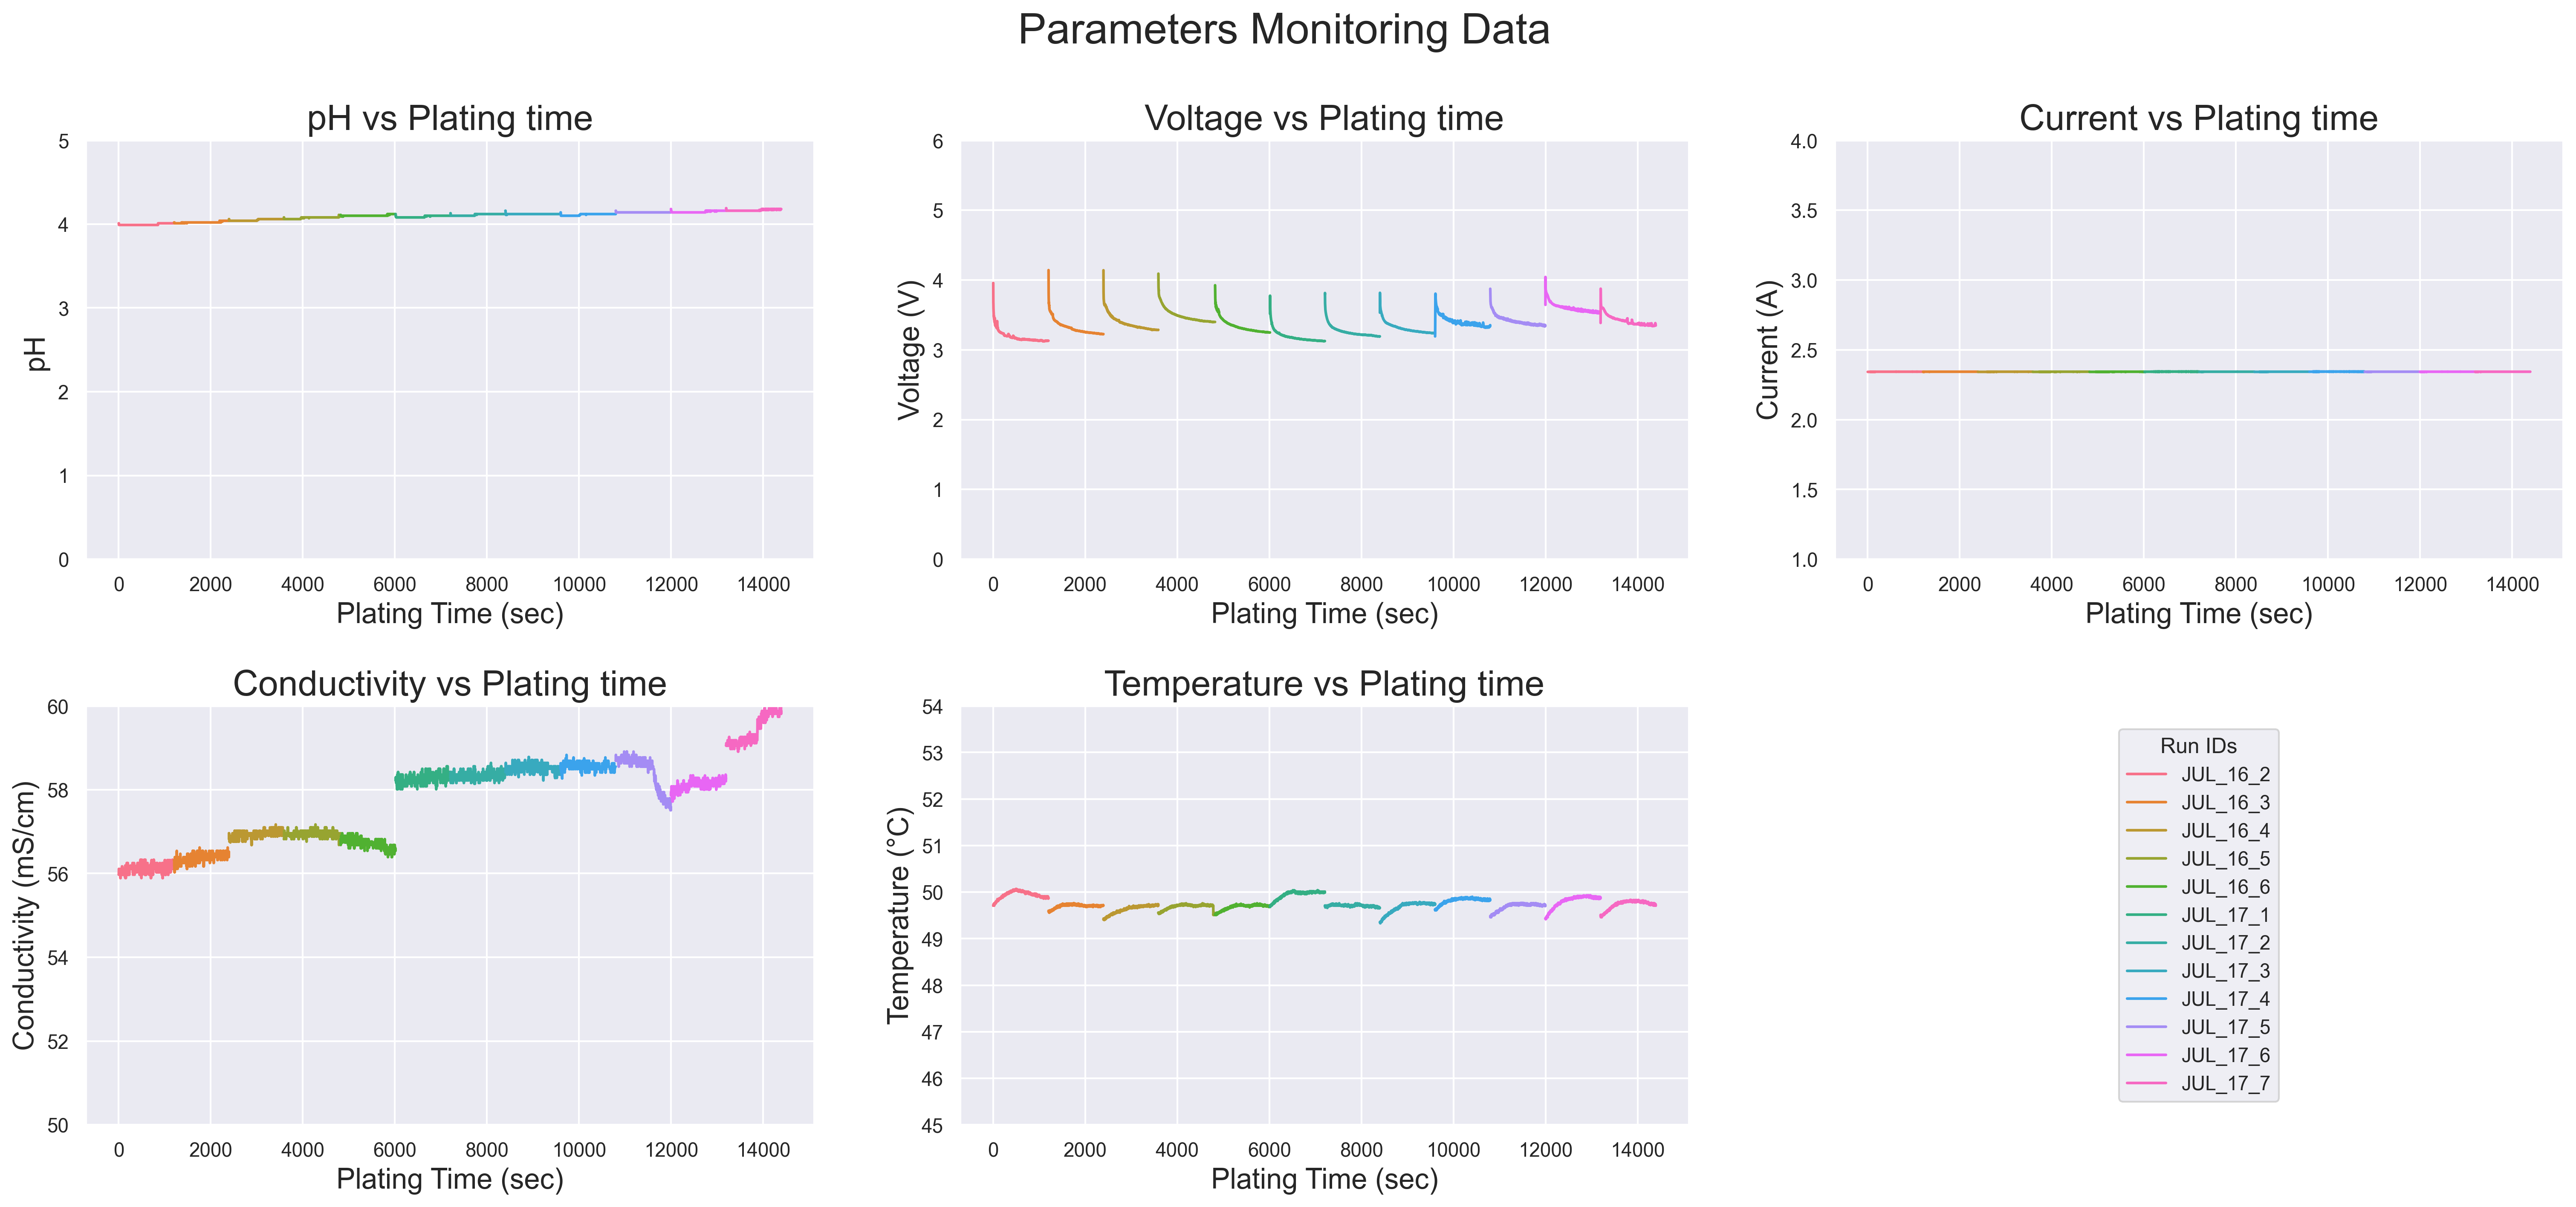

In [14]:
condition = (internal_df['bath_id'] == 'Bath_1')
full_bath_1 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_1, PARAMS)

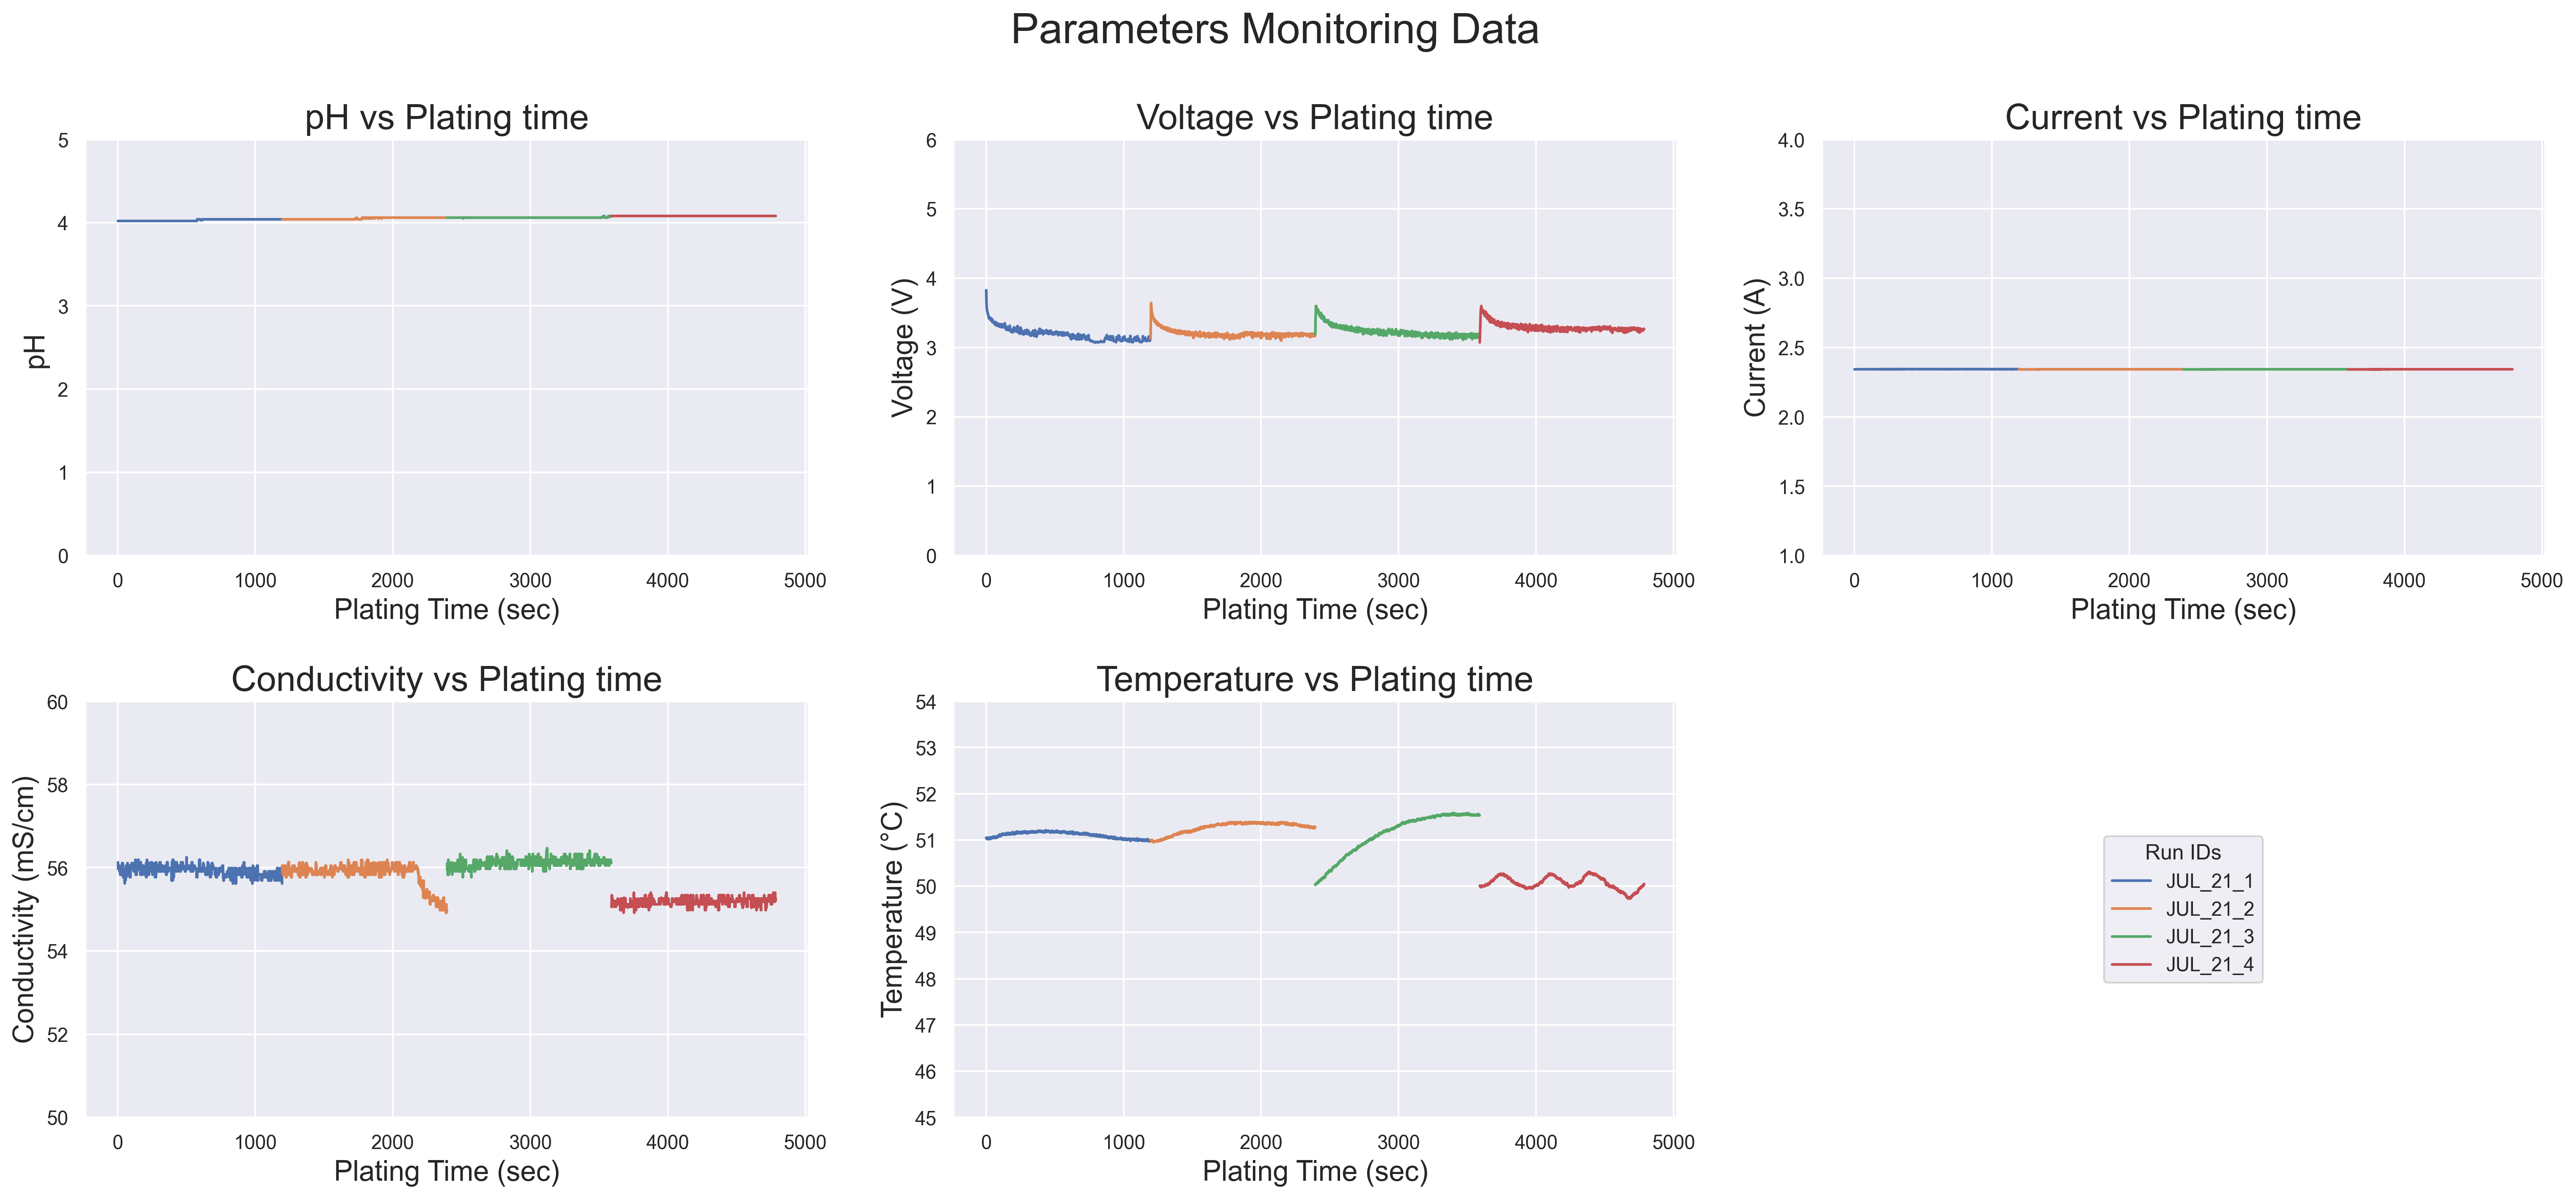

In [15]:
condition = (internal_df['bath_id'] == 'Bath_2')
full_bath_2 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_2, PARAMS)

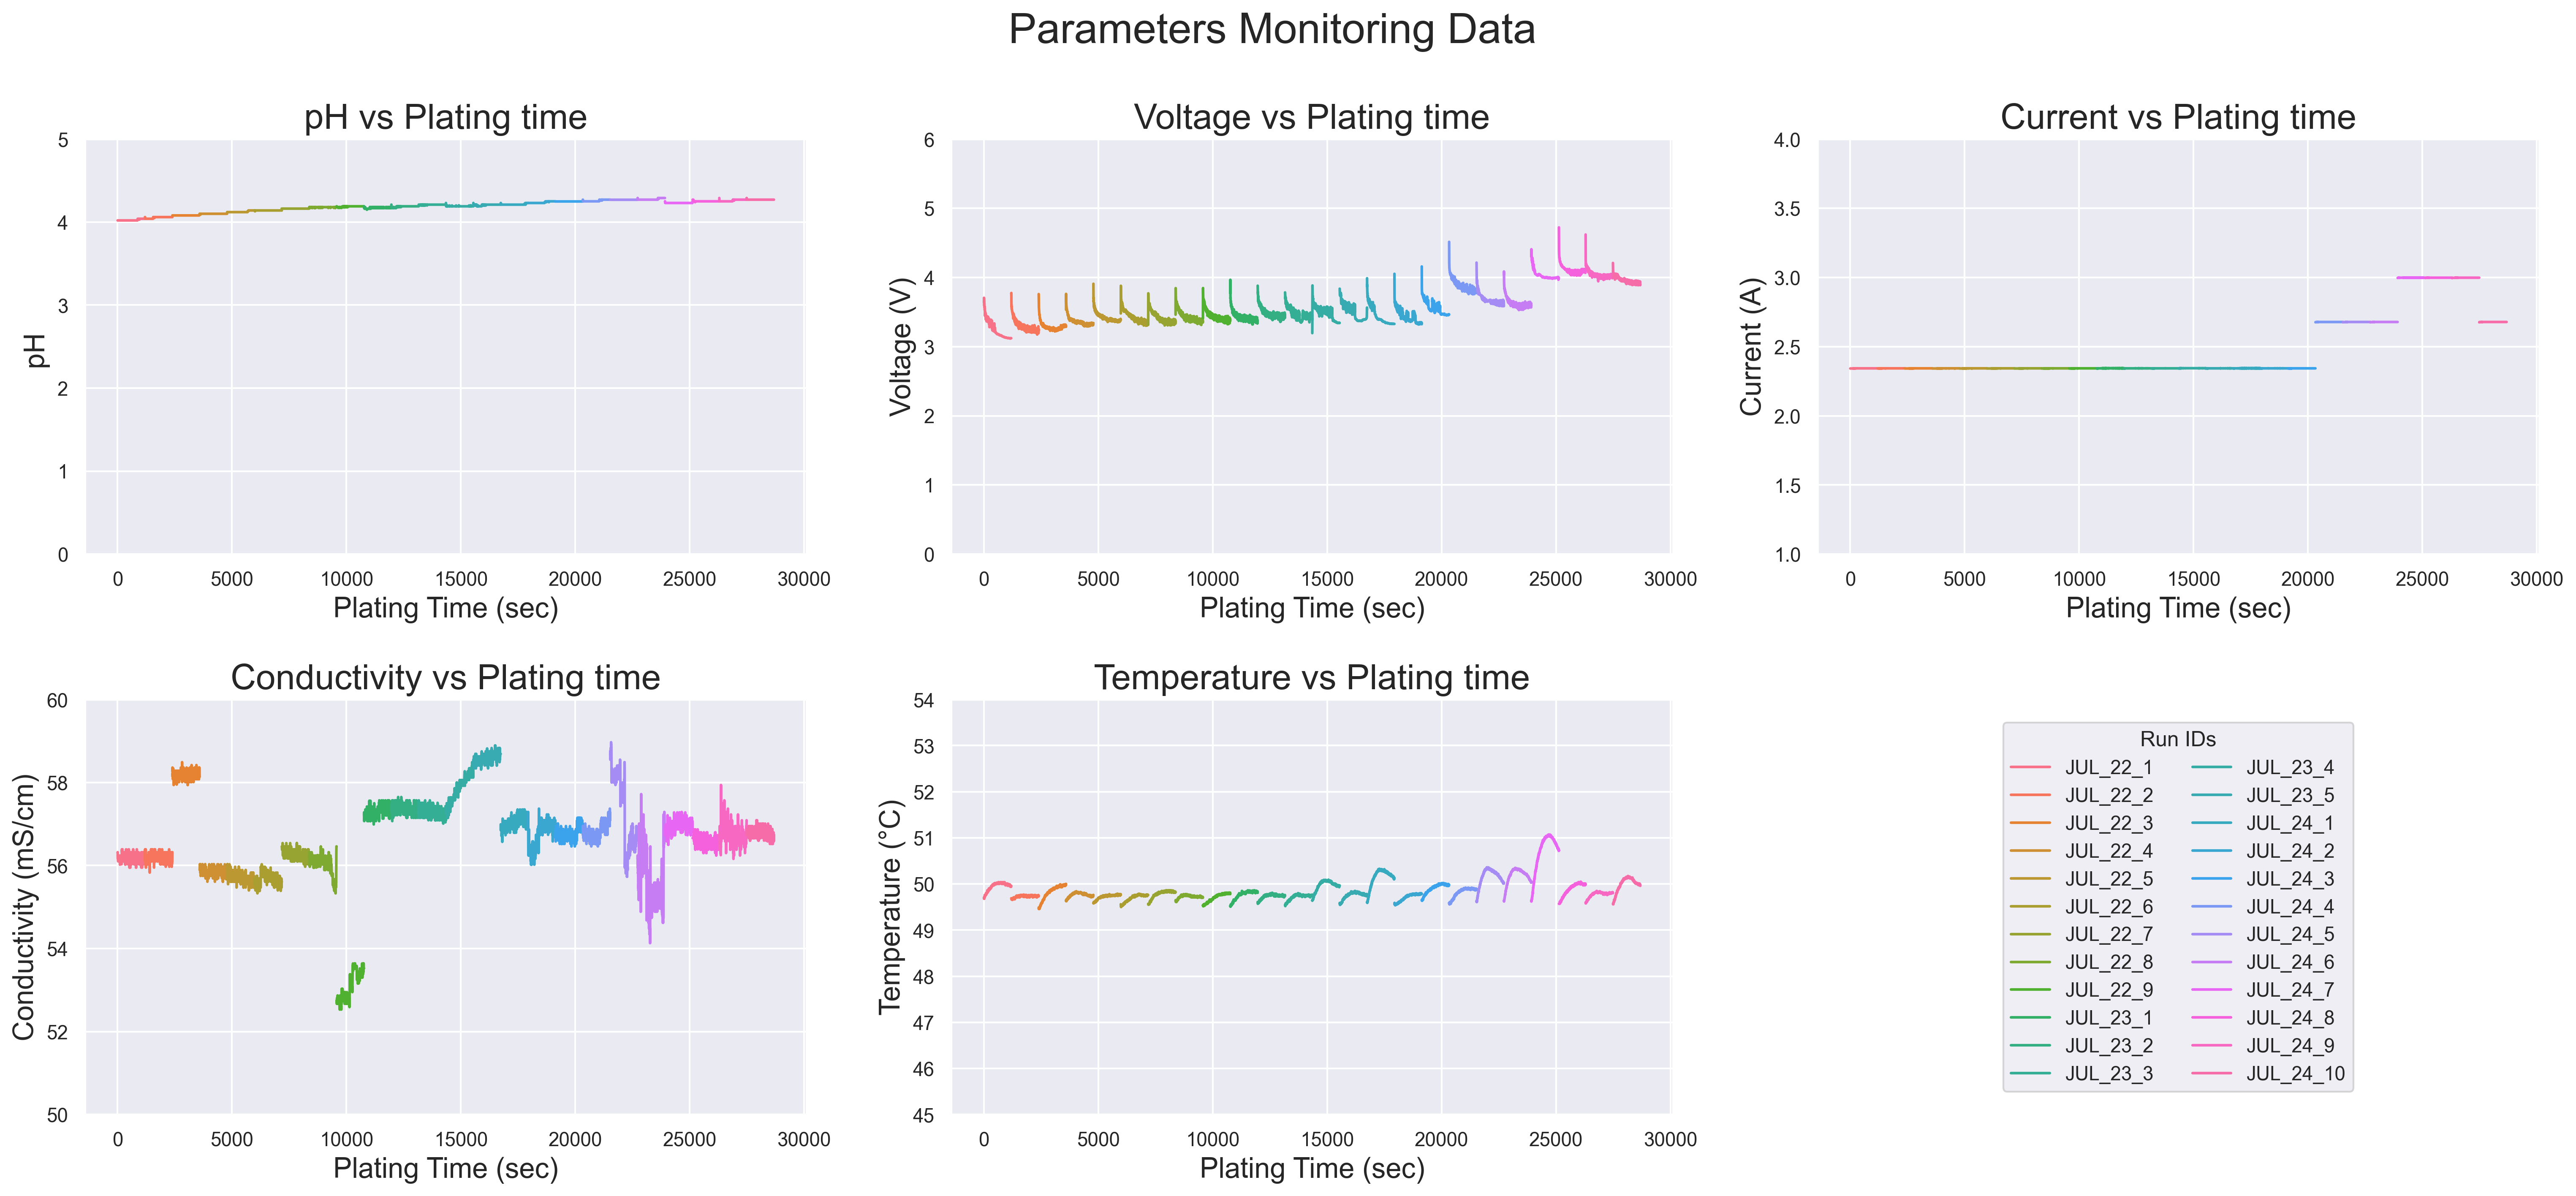

In [16]:
condition = (internal_df['bath_id'] == 'Bath_3')
full_bath_3 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_3, PARAMS)

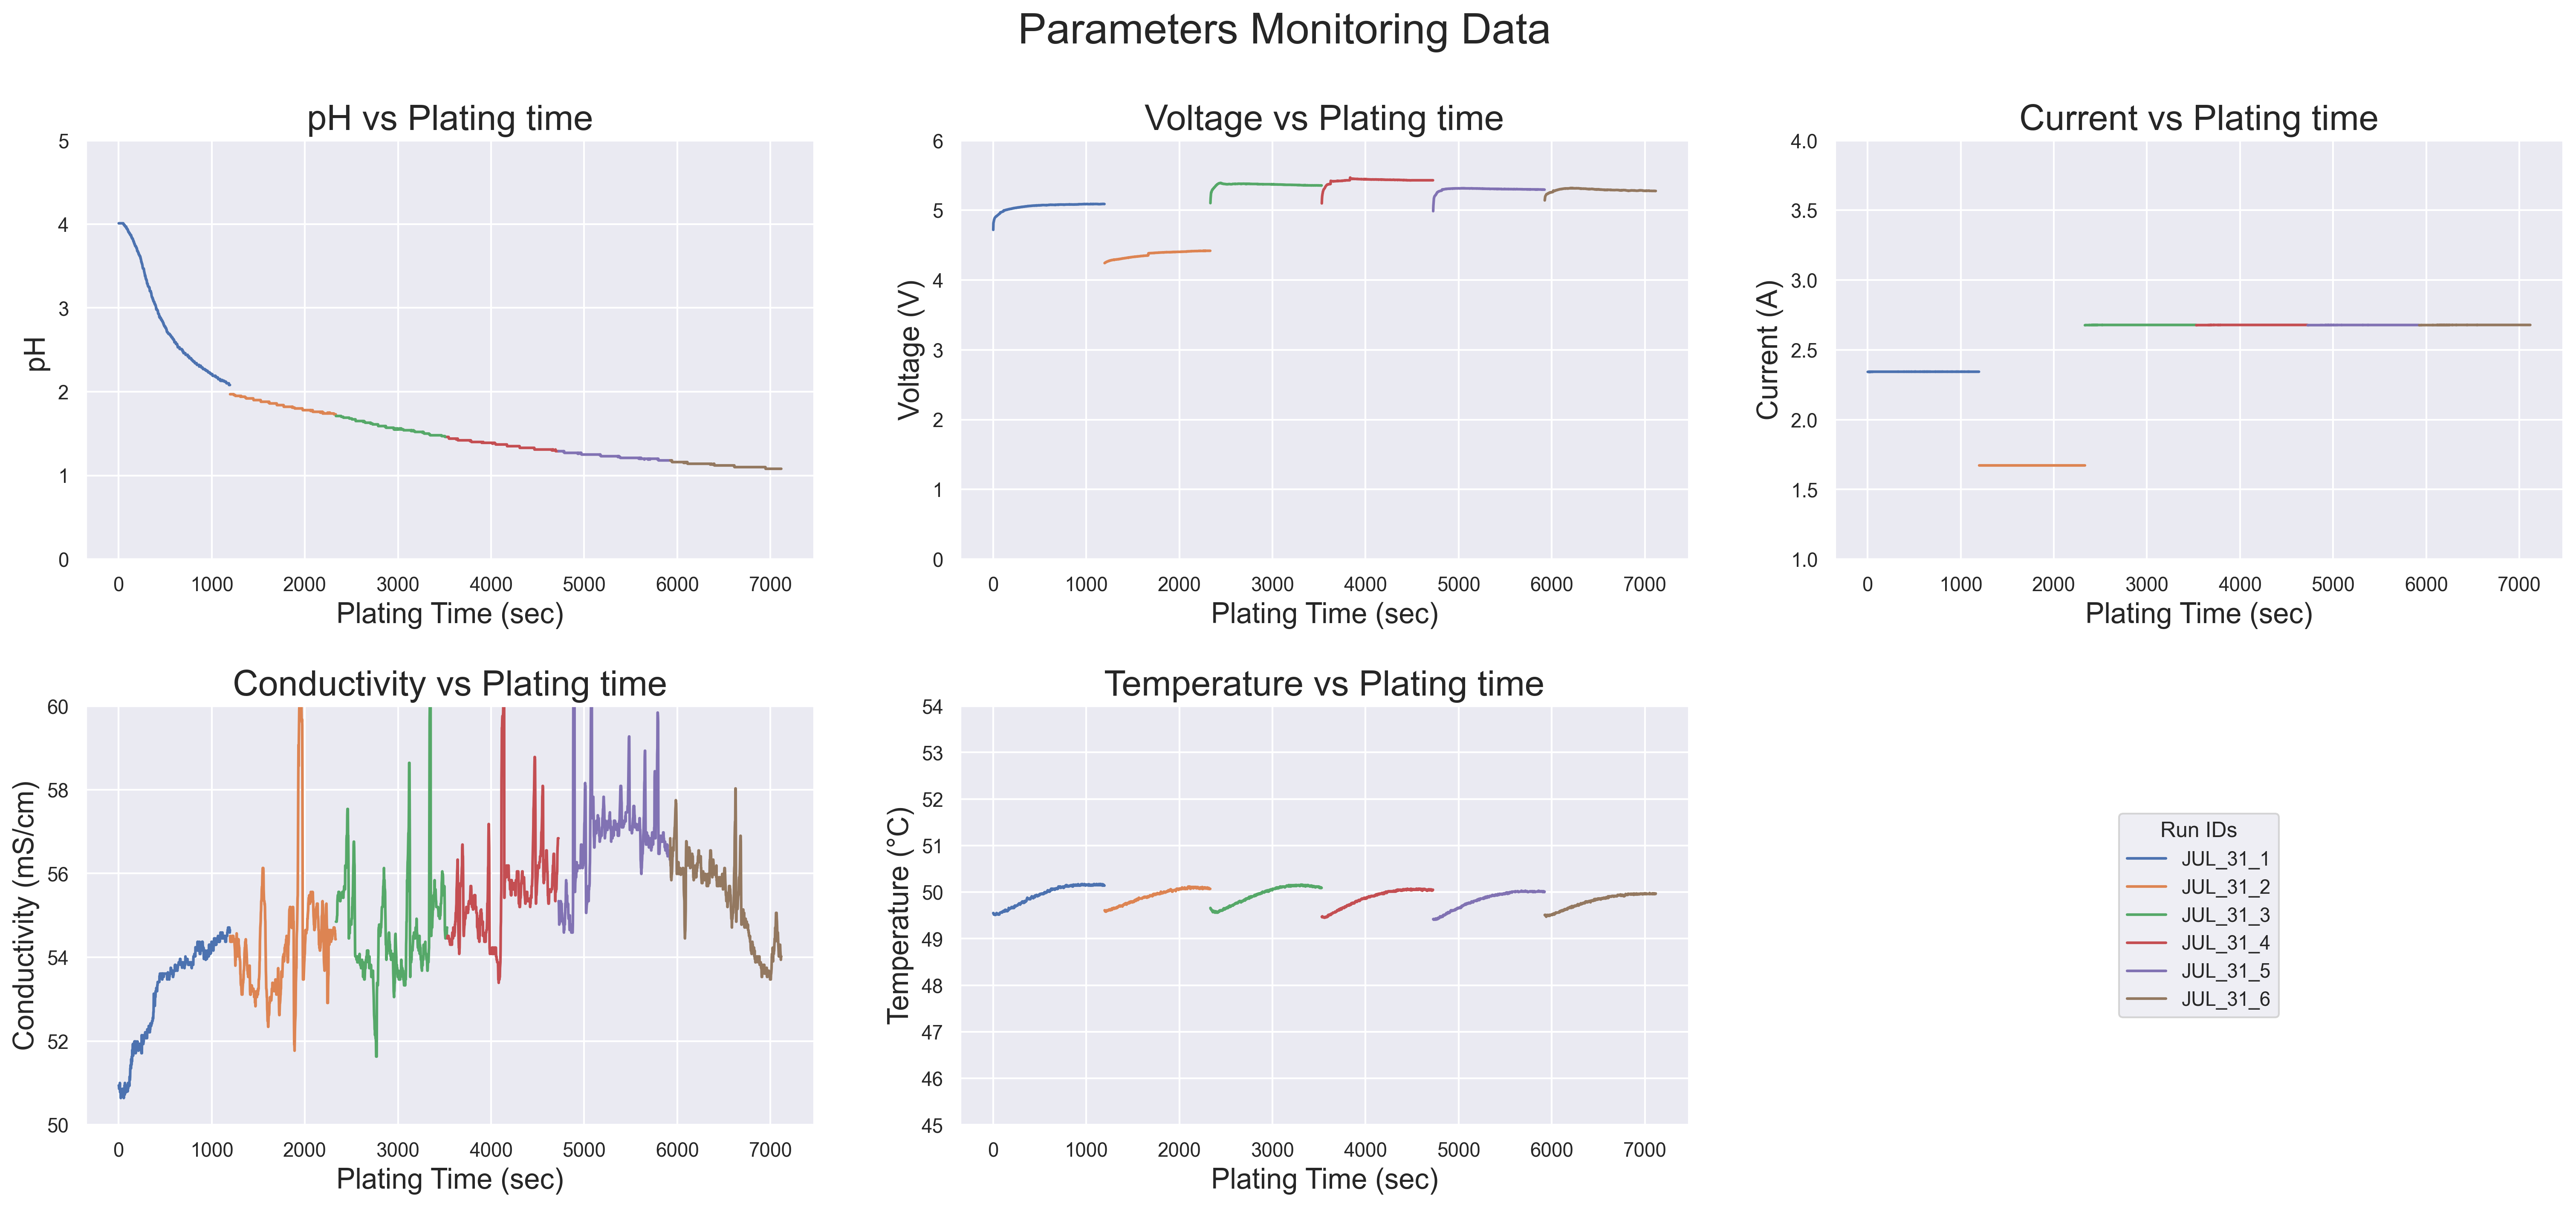

In [17]:
condition = (internal_df['bath_id'] == 'Bath_4')
full_bath_3 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_3, PARAMS)

# **Finding trend of current density and agitation rate from 24 July experiment**

## Comparison the agitation rate [100 rpm, 300 rpm, 600 rpm]

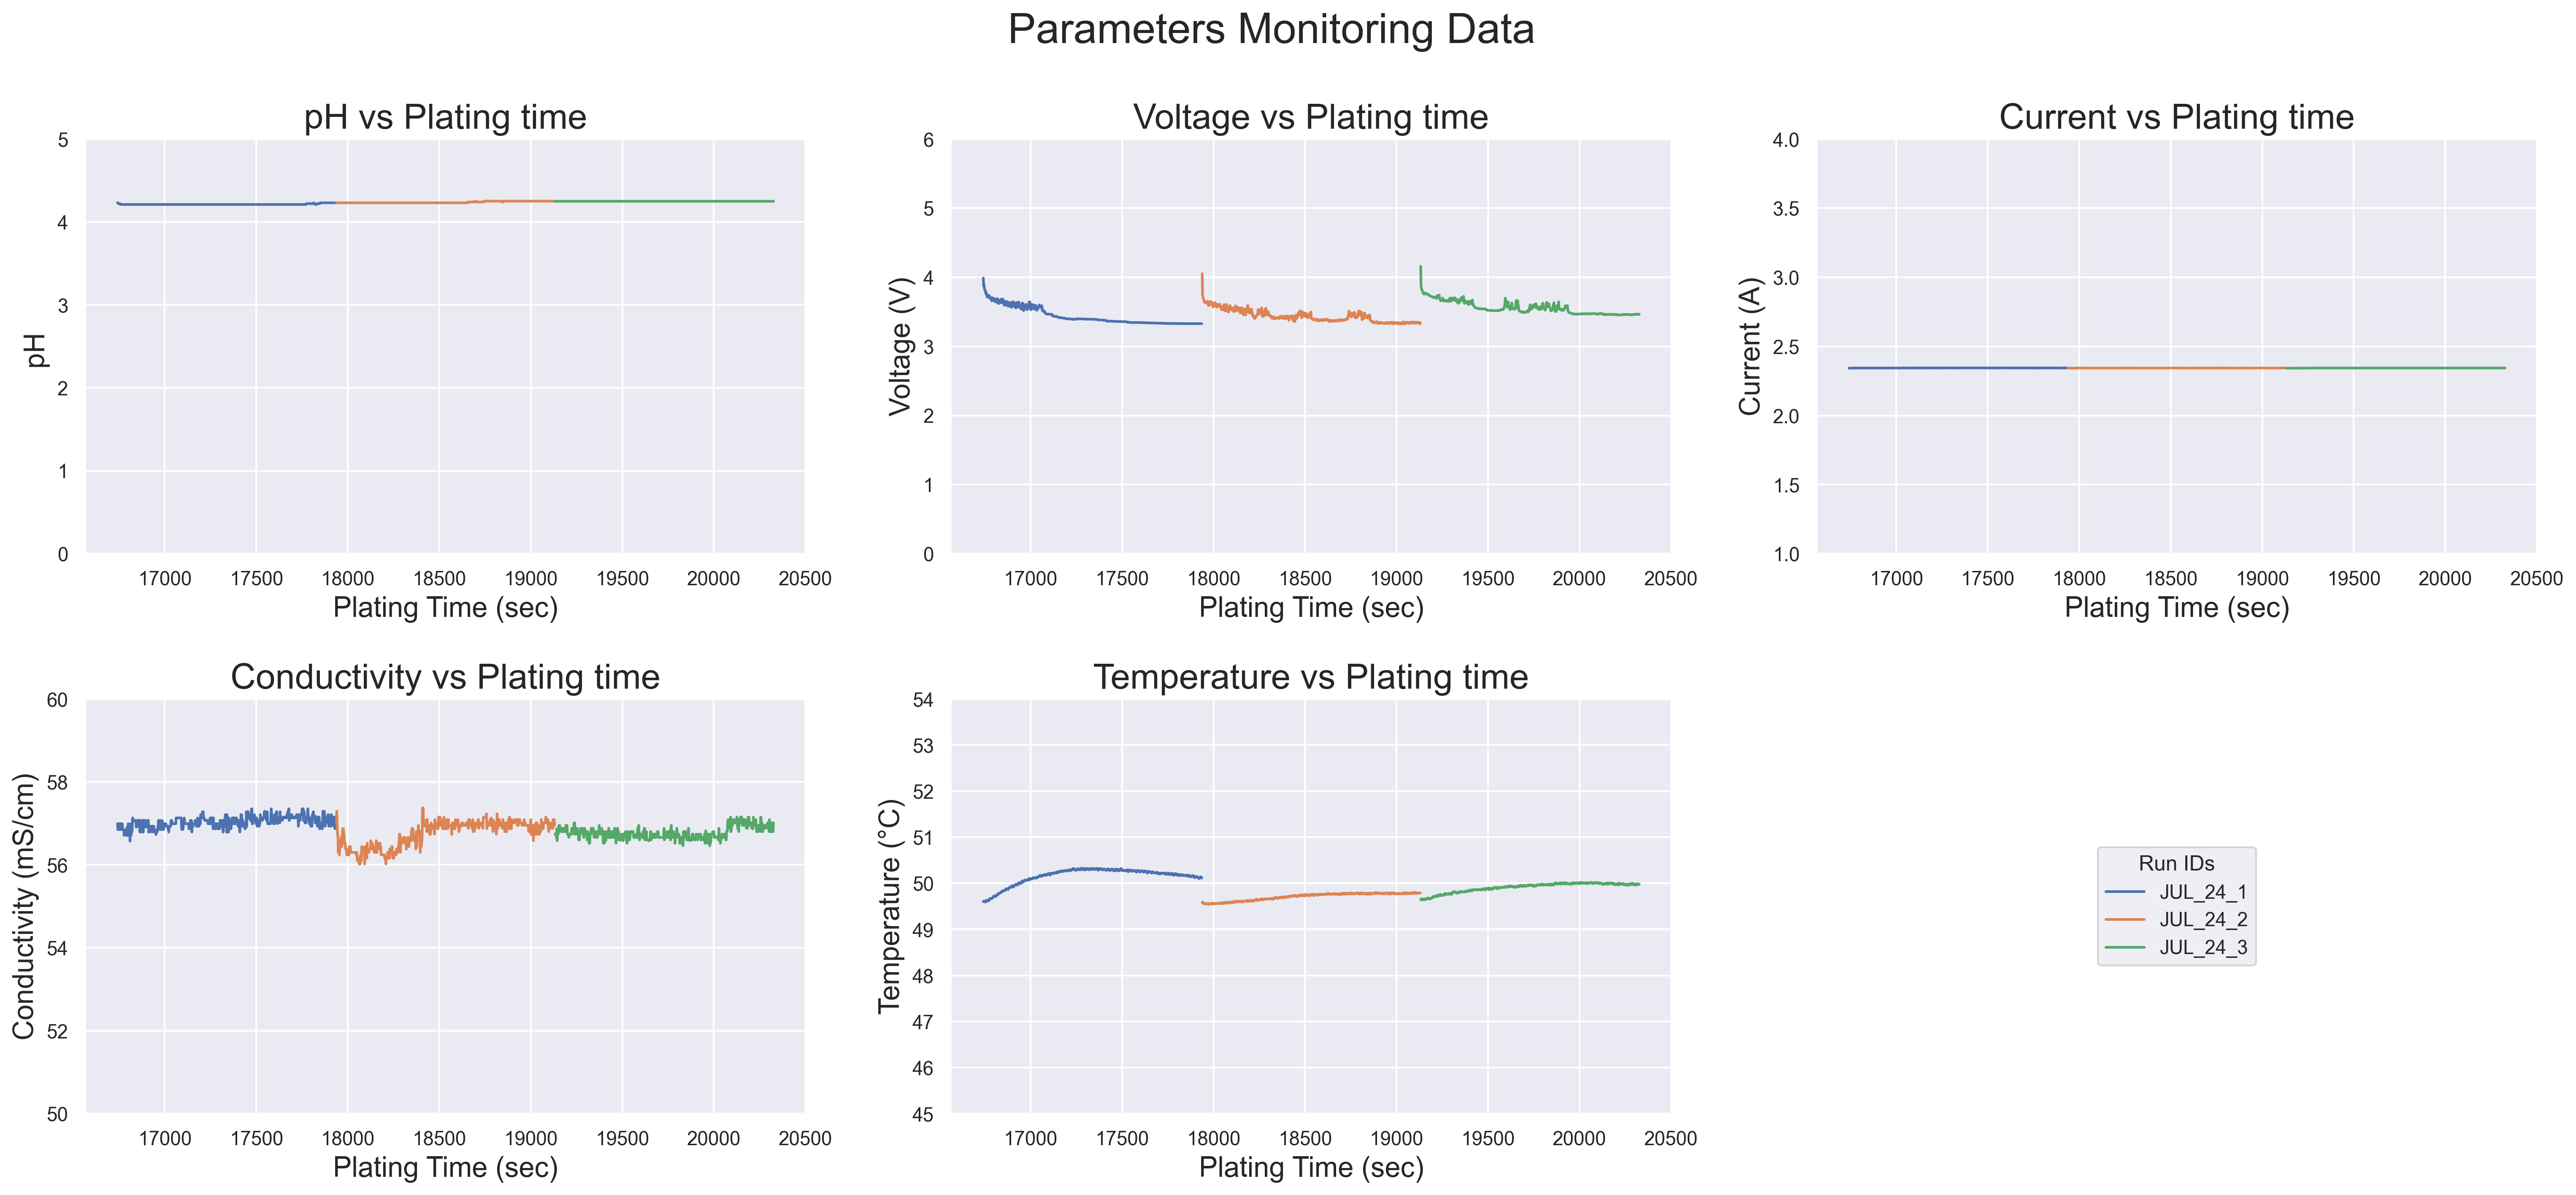

In [18]:
plot_all_params(internal_df, ['JUL_24_1', 'JUL_24_2', 'JUL_24_3'], PARAMS)

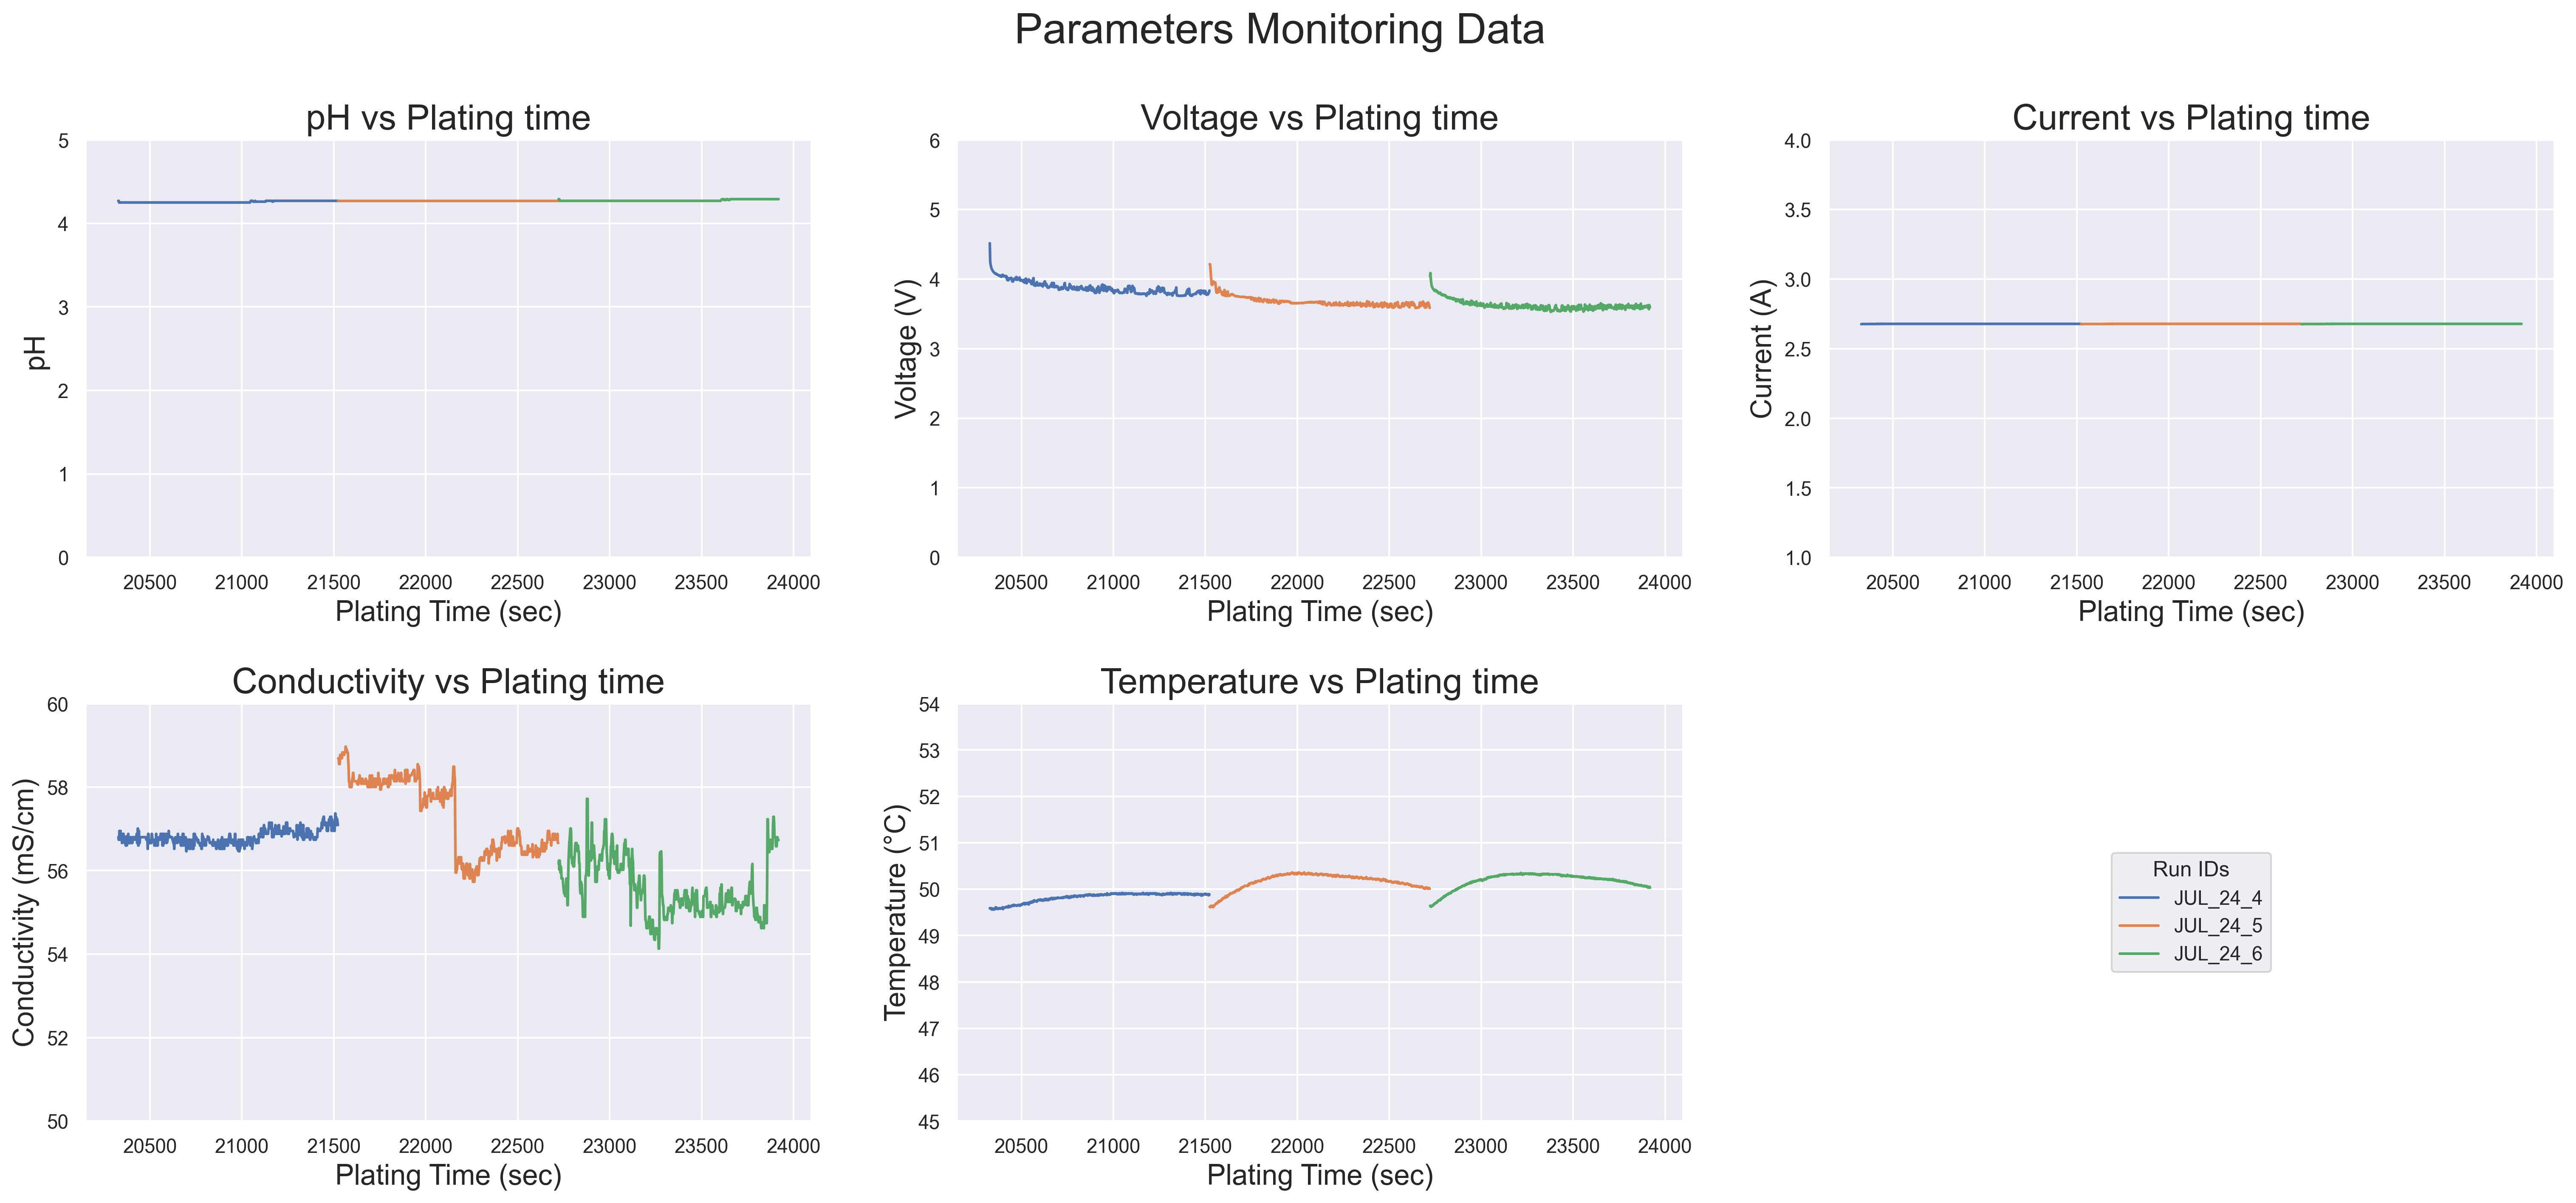

In [19]:
plot_all_params(internal_df, ['JUL_24_4', 'JUL_24_5', 'JUL_24_6'], PARAMS)

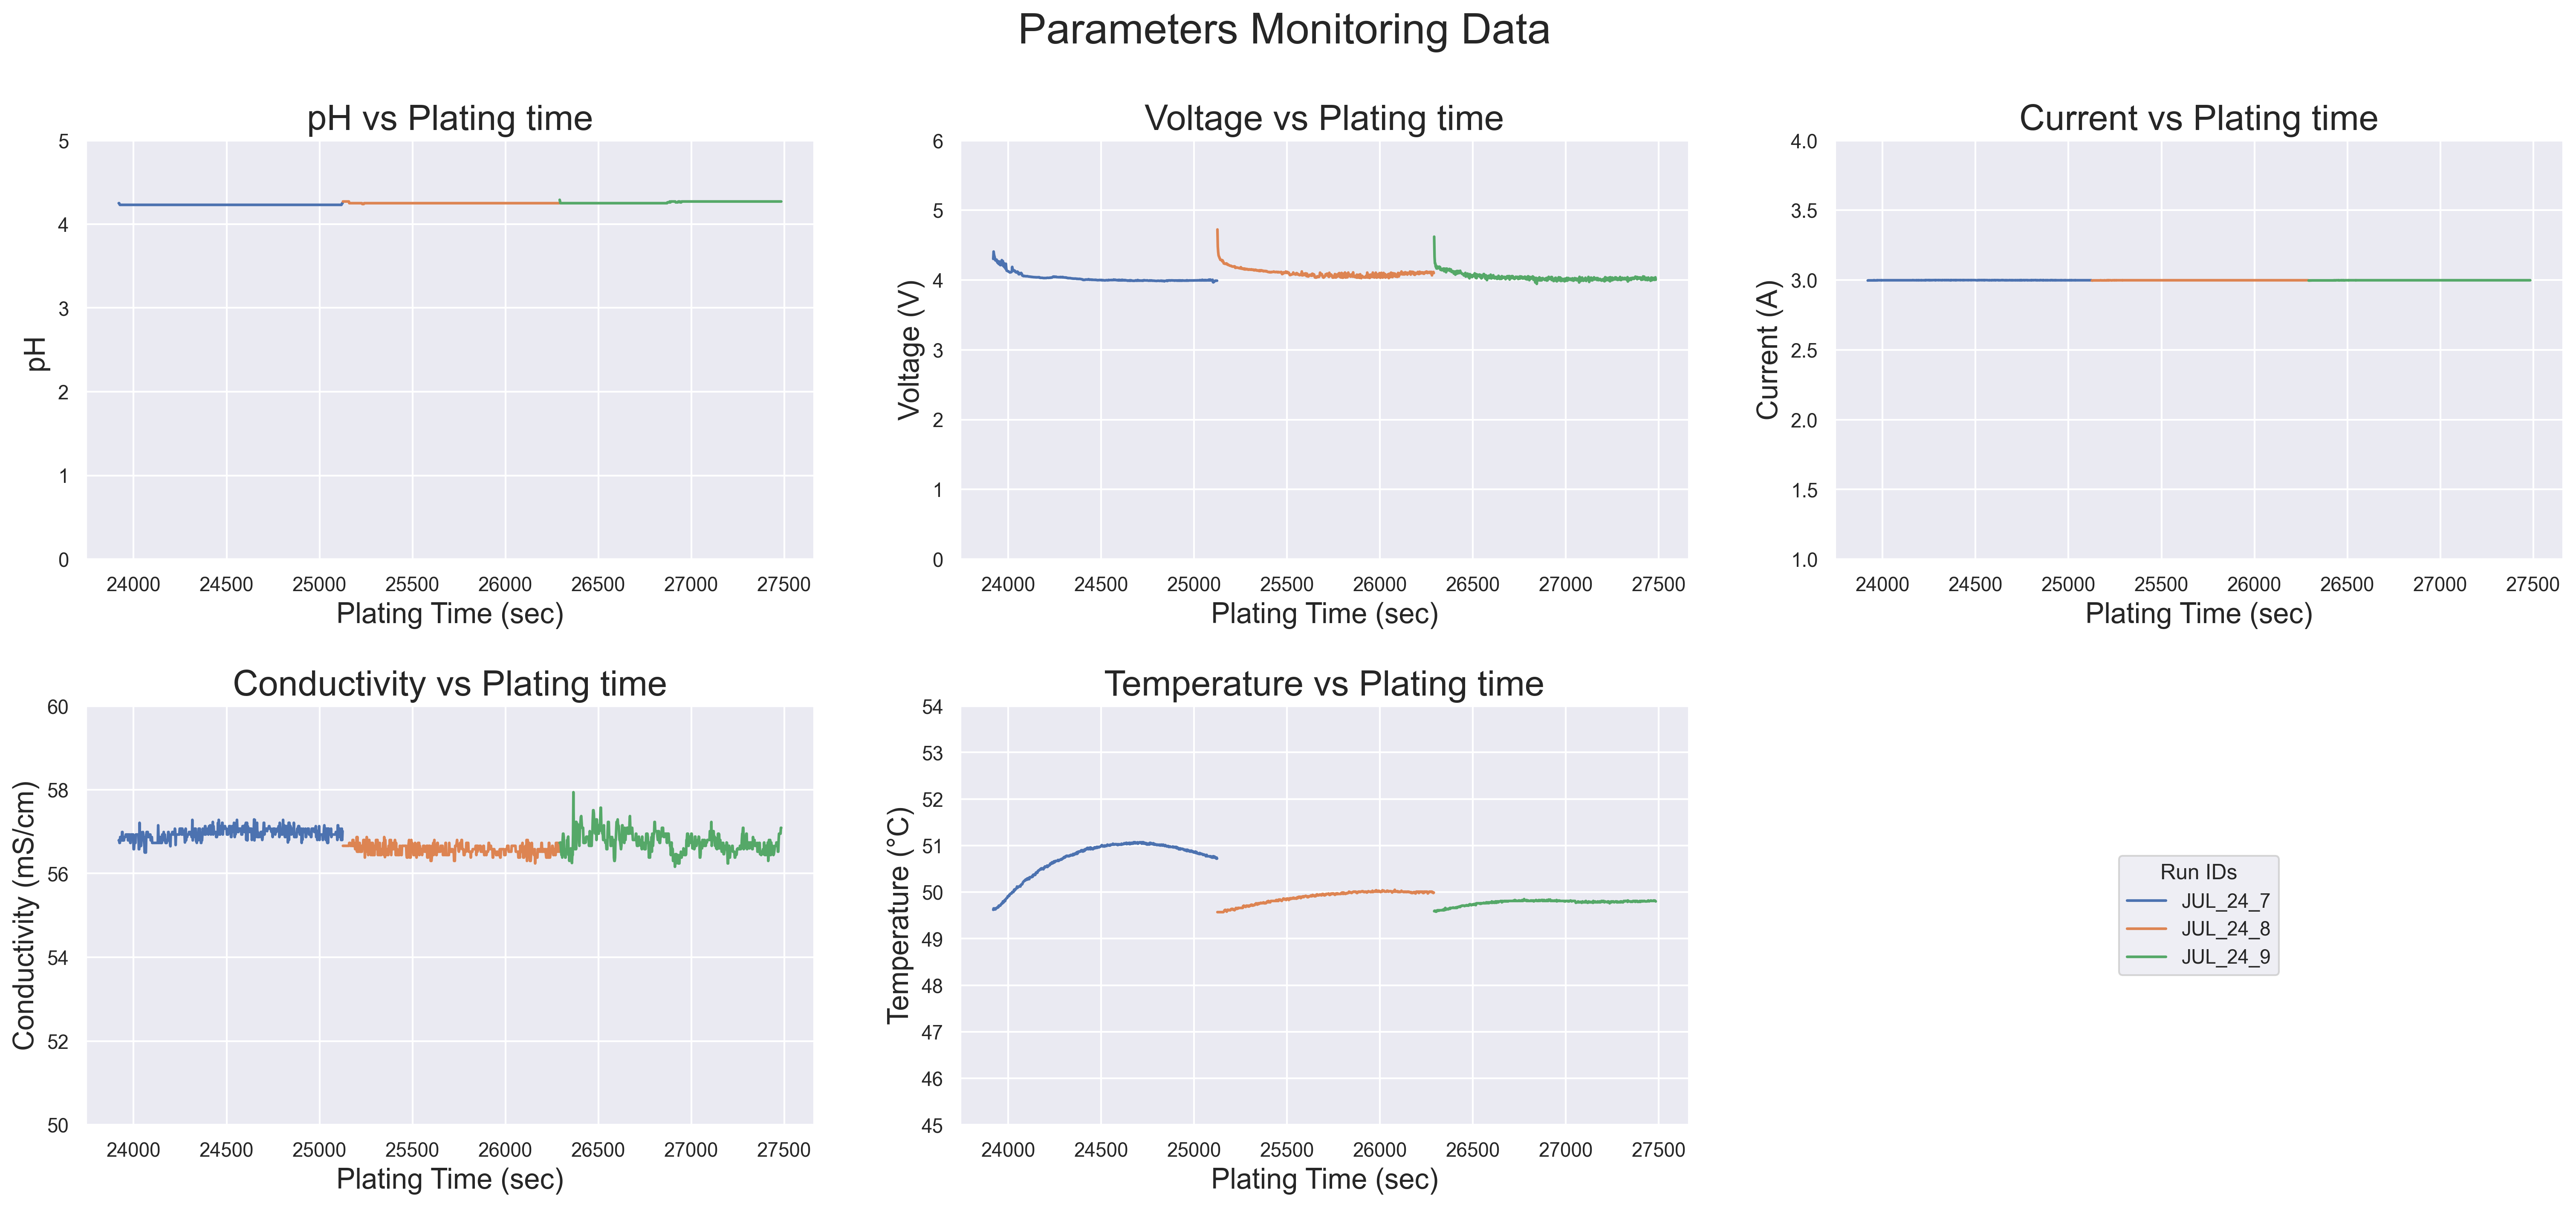

In [20]:
plot_all_params(internal_df, ['JUL_24_7', 'JUL_24_8', 'JUL_24_9'], PARAMS)

## 
---

## Comparison current density at the same agitation rate

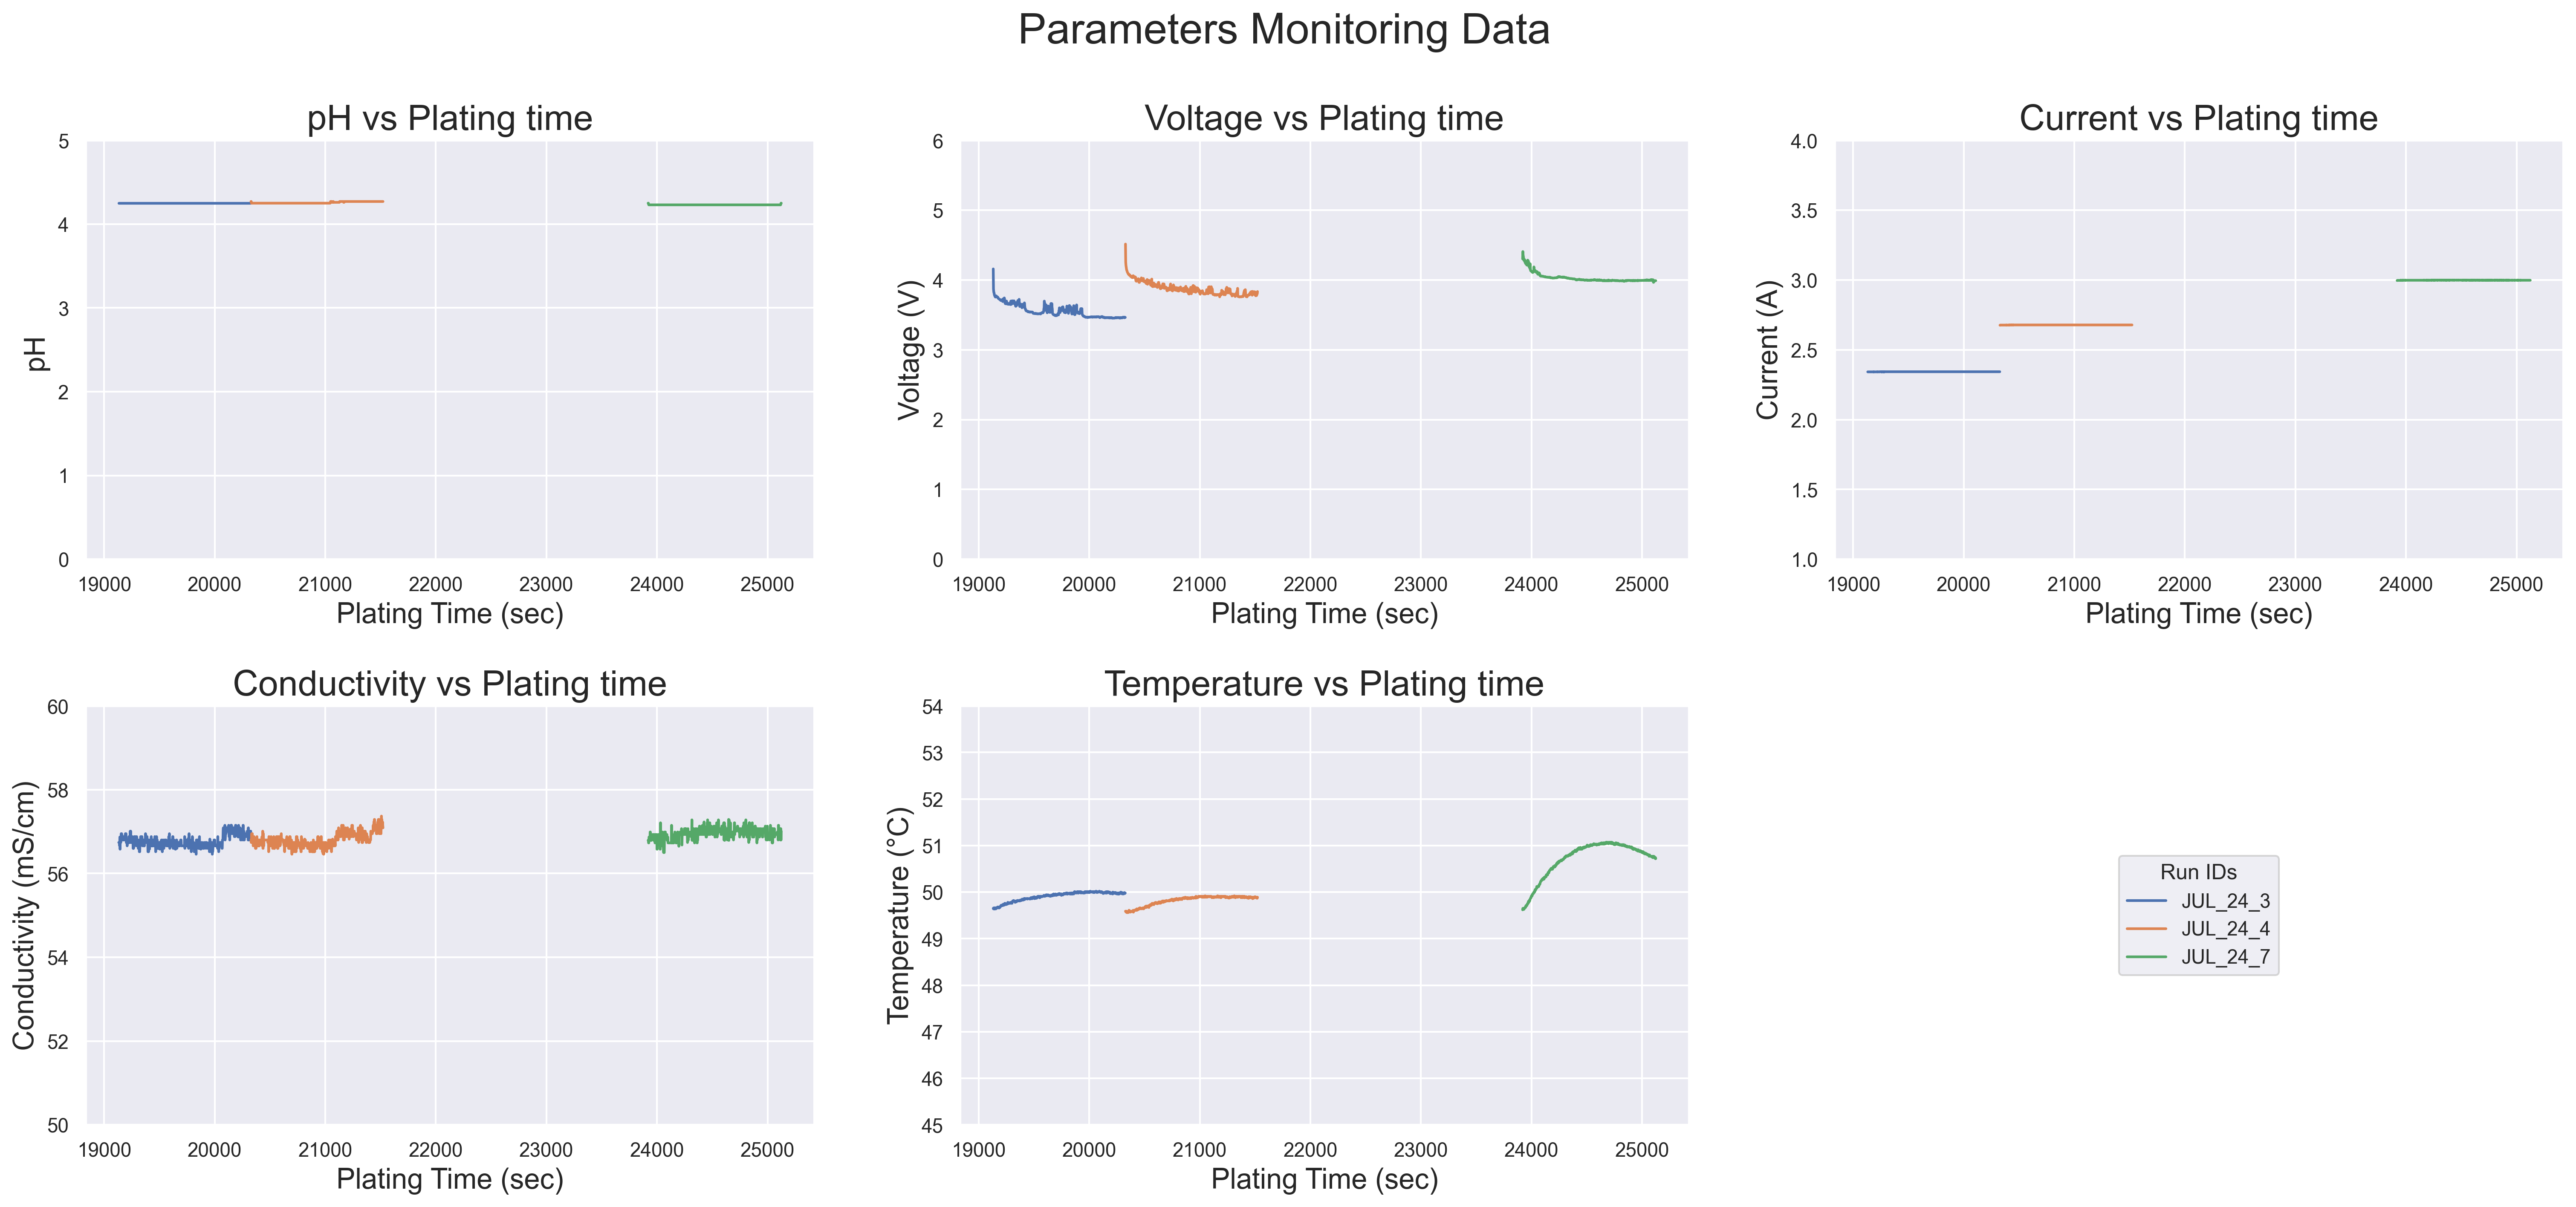

In [21]:
plot_all_params(internal_df, ['JUL_24_3', 'JUL_24_4', 'JUL_24_7'], PARAMS)

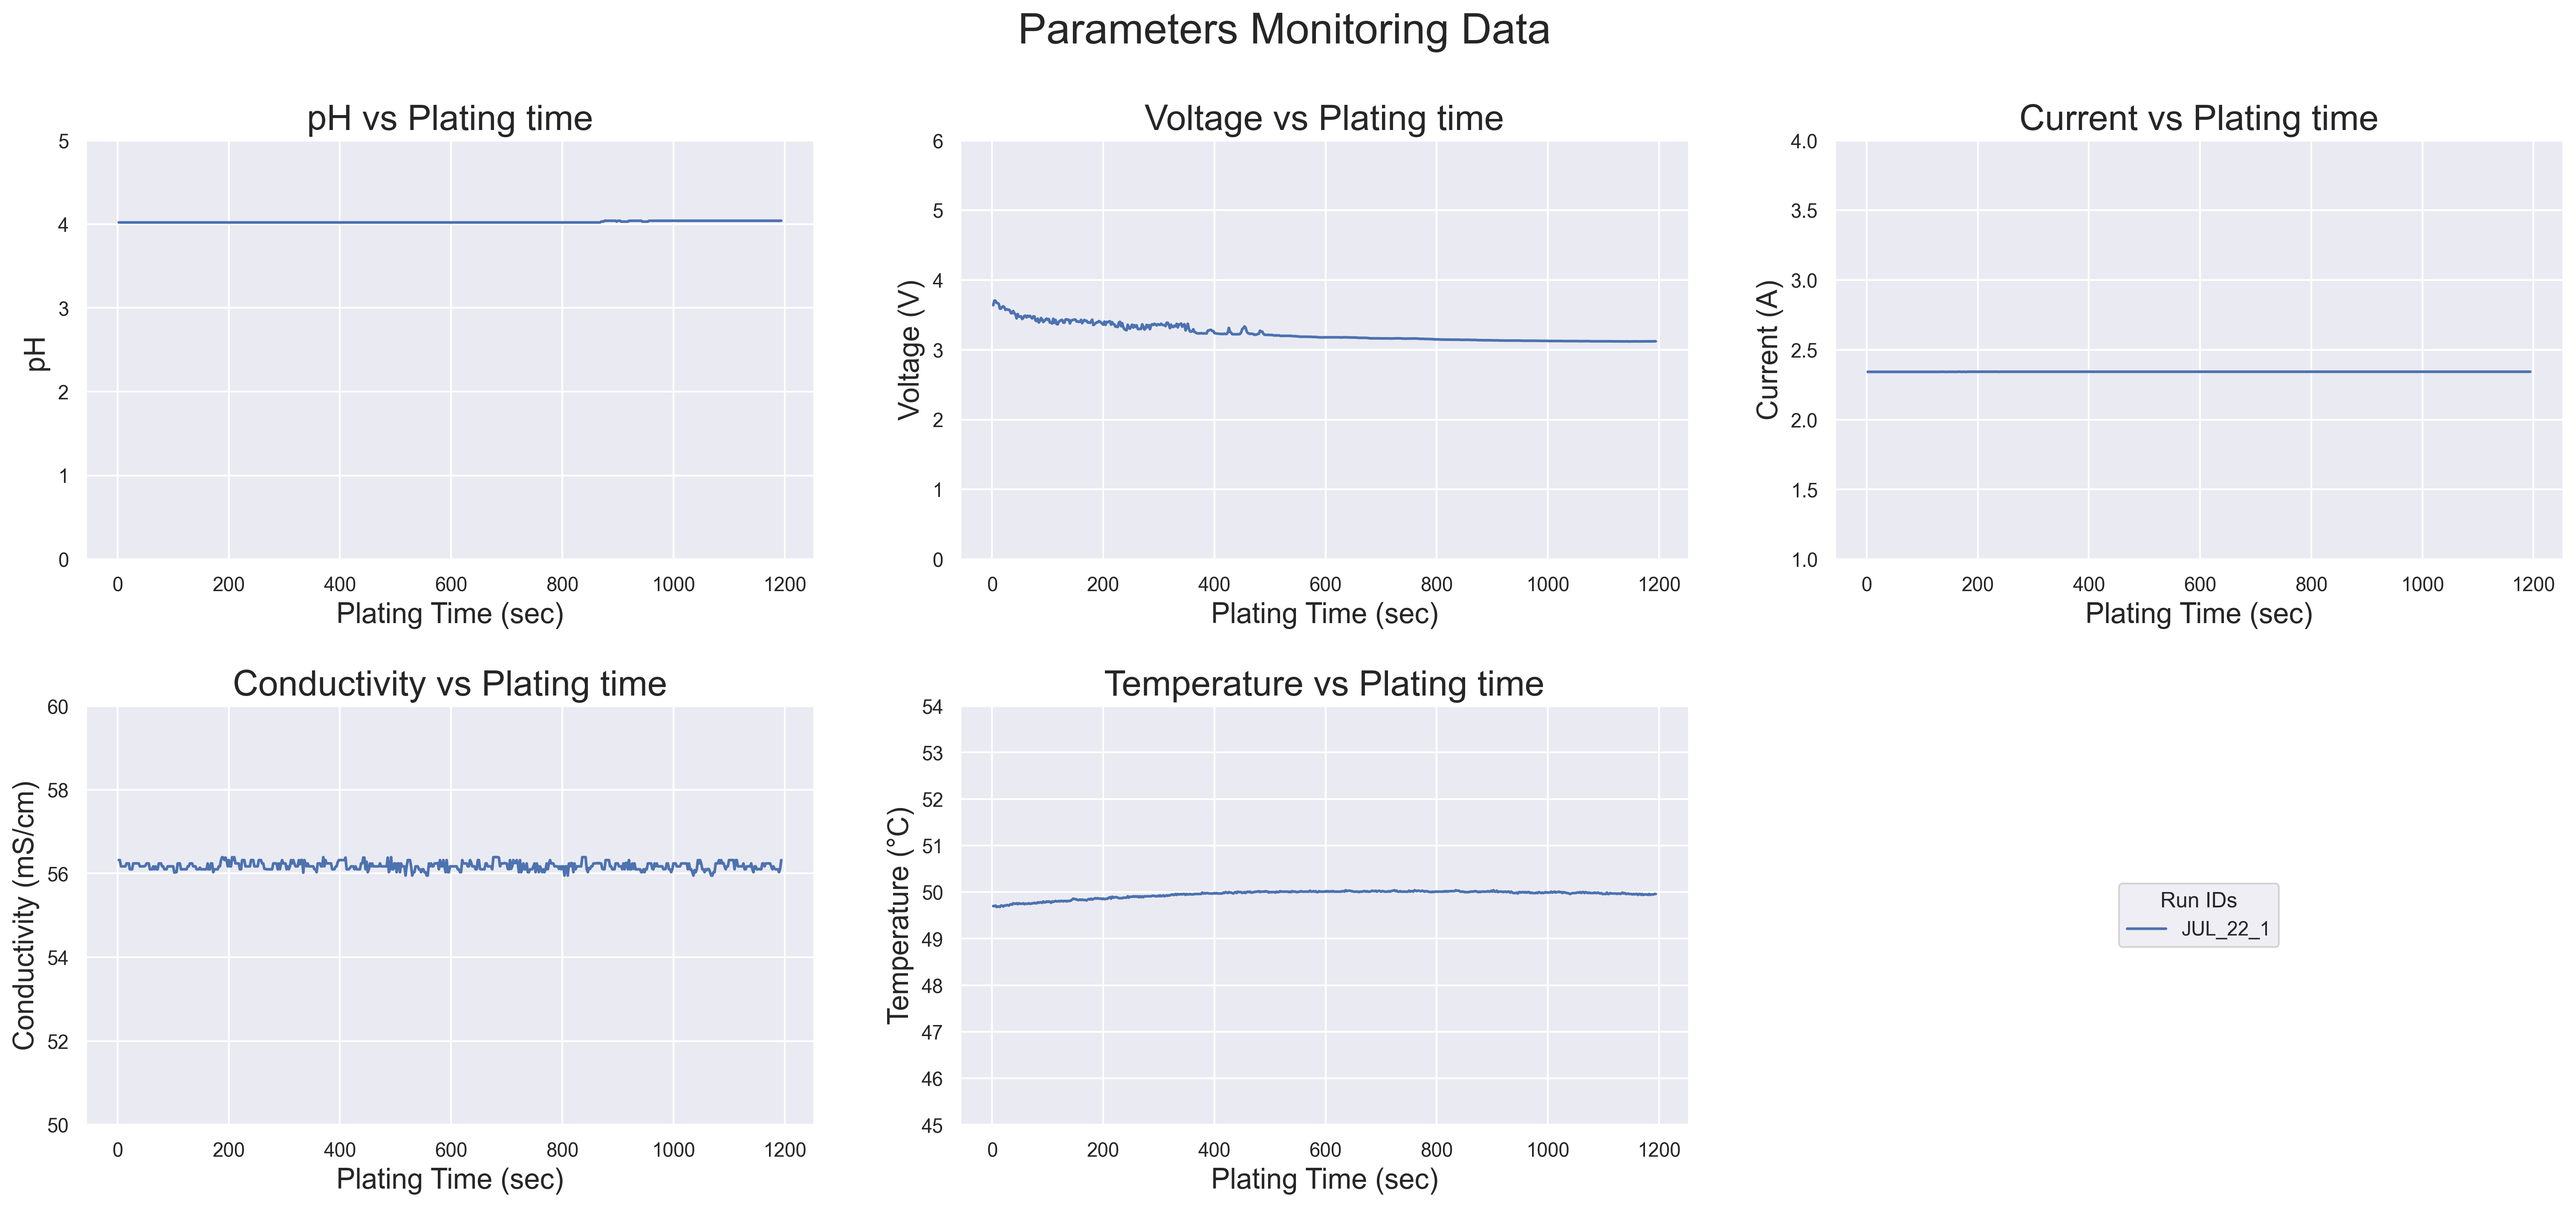

In [22]:
plot_all_params(combined_df, ['JUL_22_1'], PARAMS)

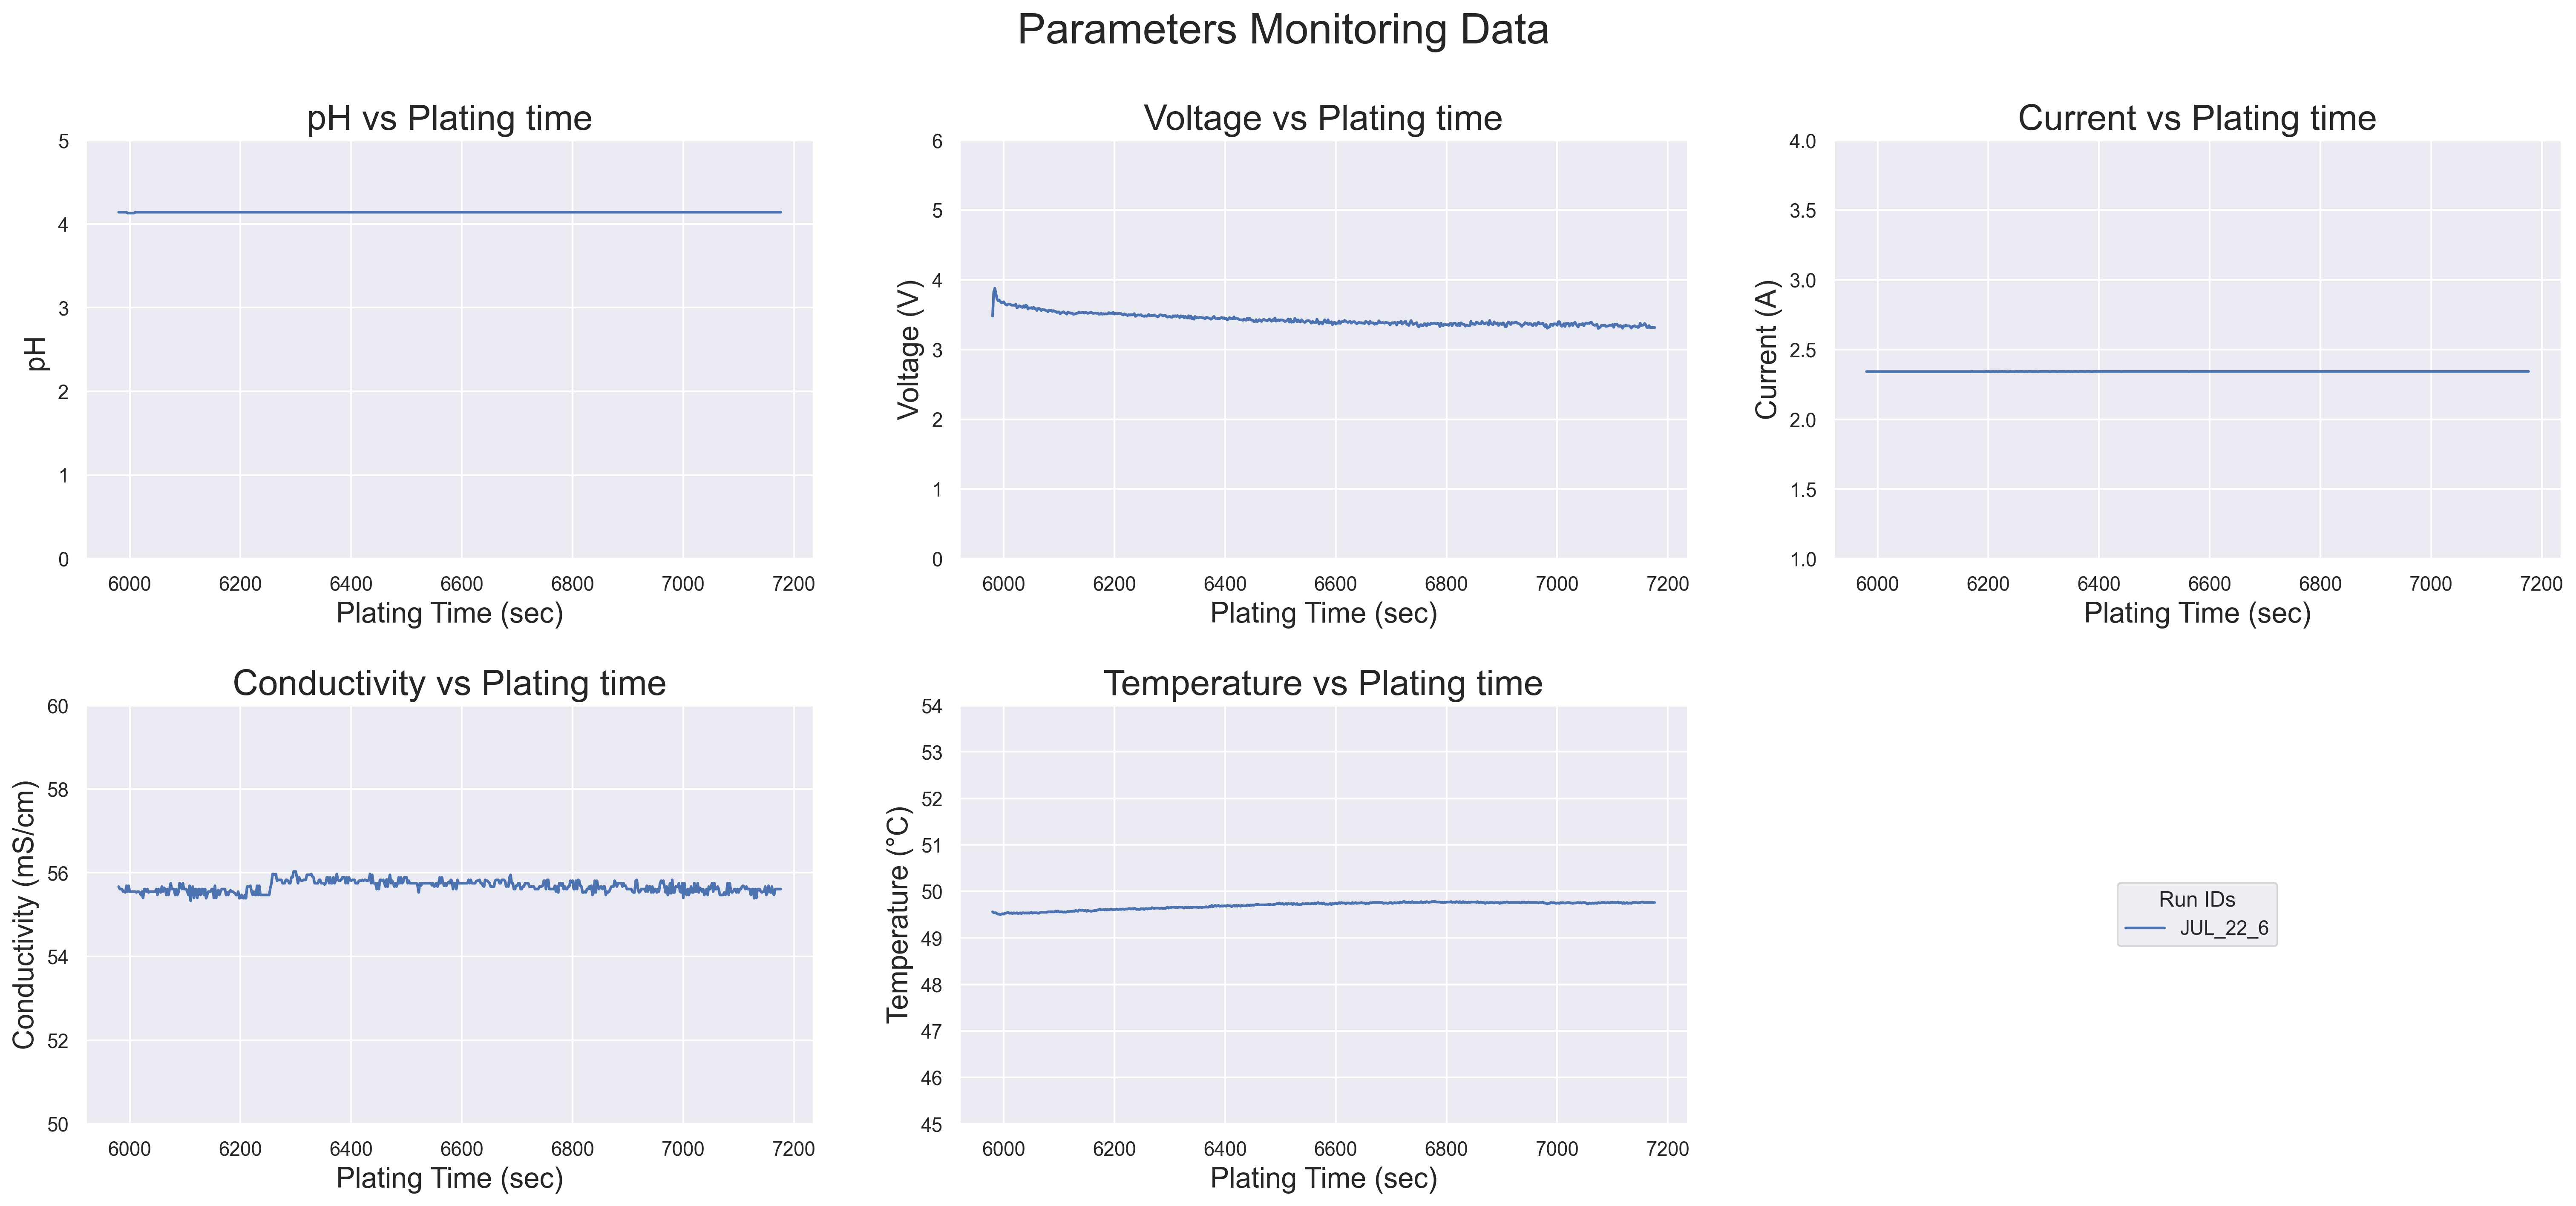

In [23]:
plot_all_params(combined_df, ['JUL_22_6'], PARAMS)

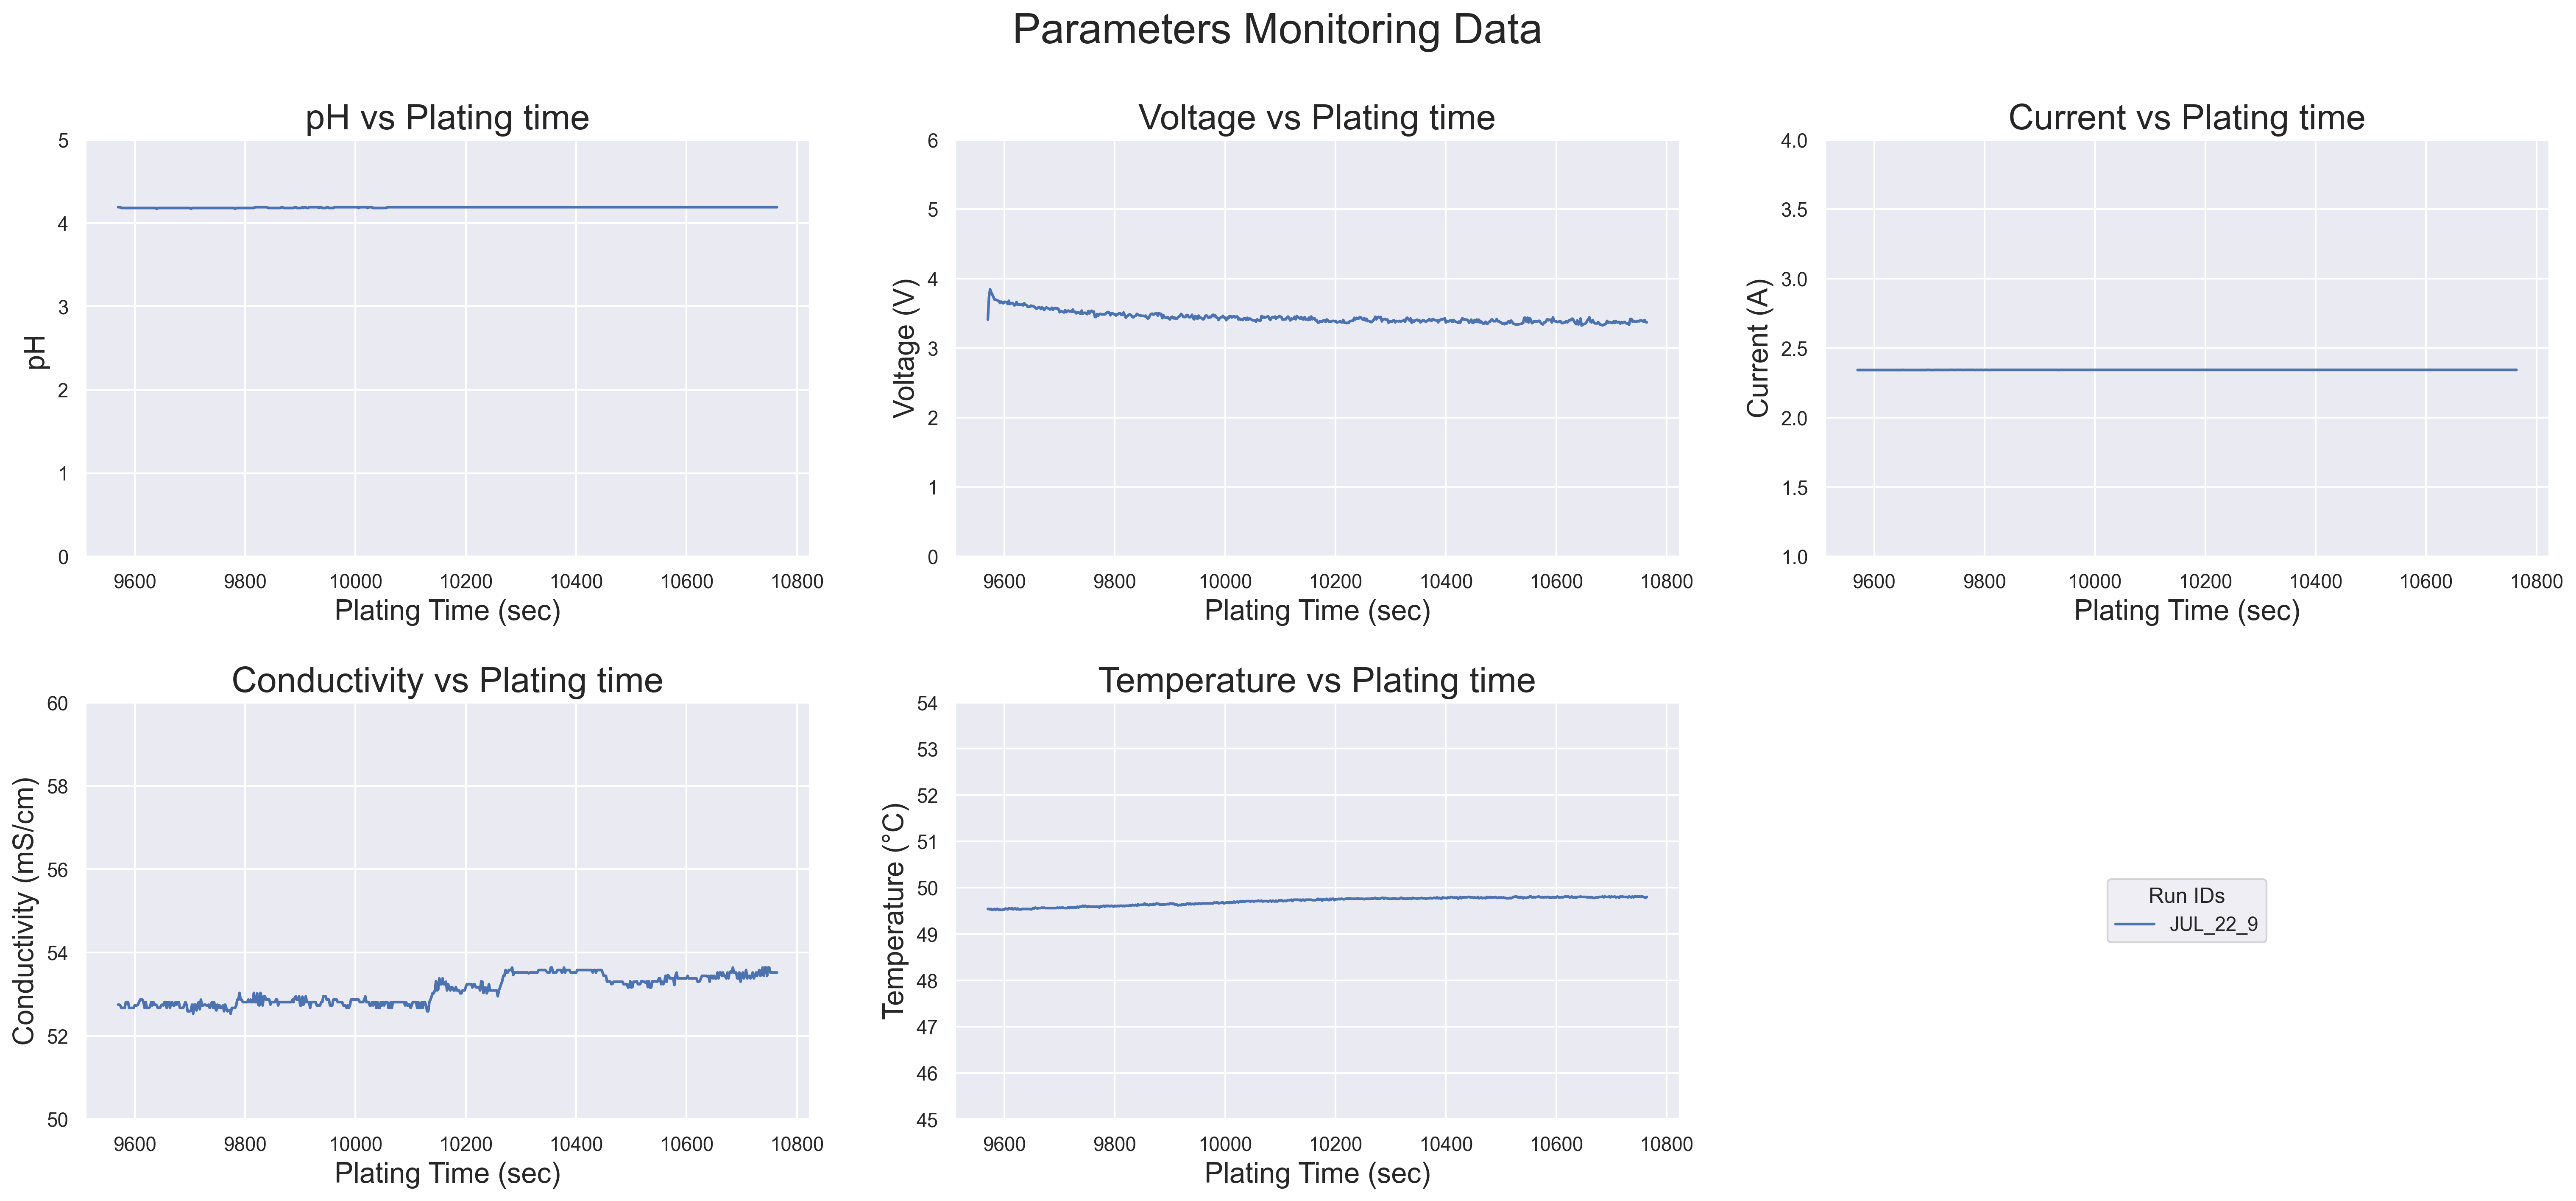

In [24]:
plot_all_params(combined_df, ['JUL_22_9'], PARAMS)

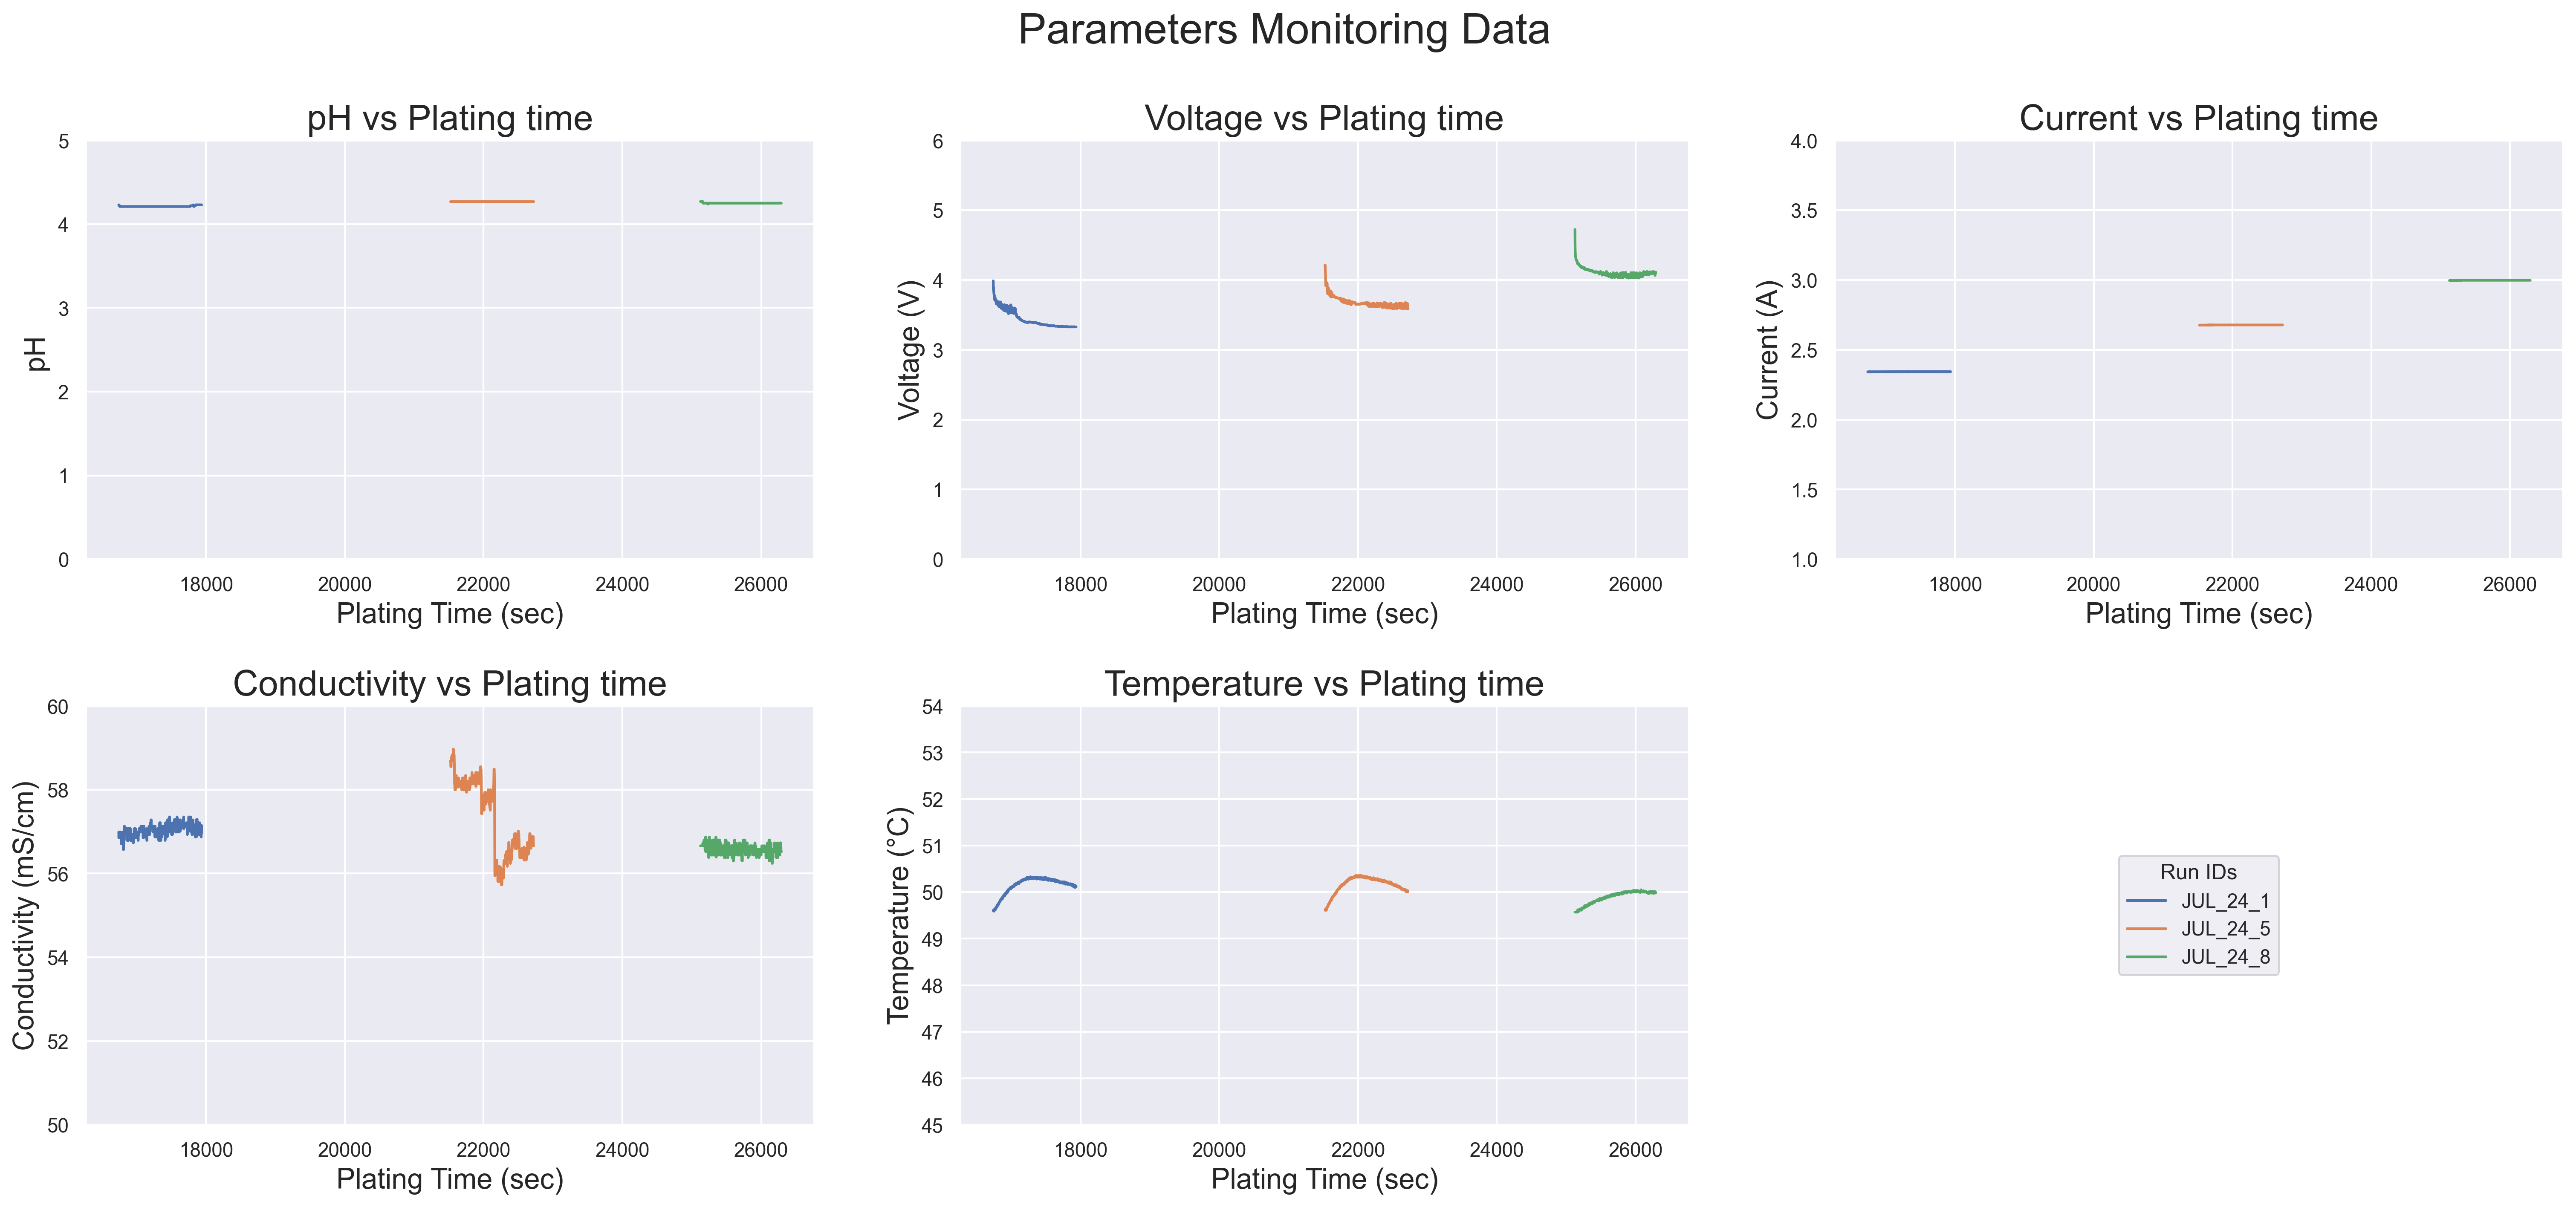

In [25]:
plot_all_params(internal_df, ['JUL_24_1', 'JUL_24_5', 'JUL_24_8'], PARAMS)

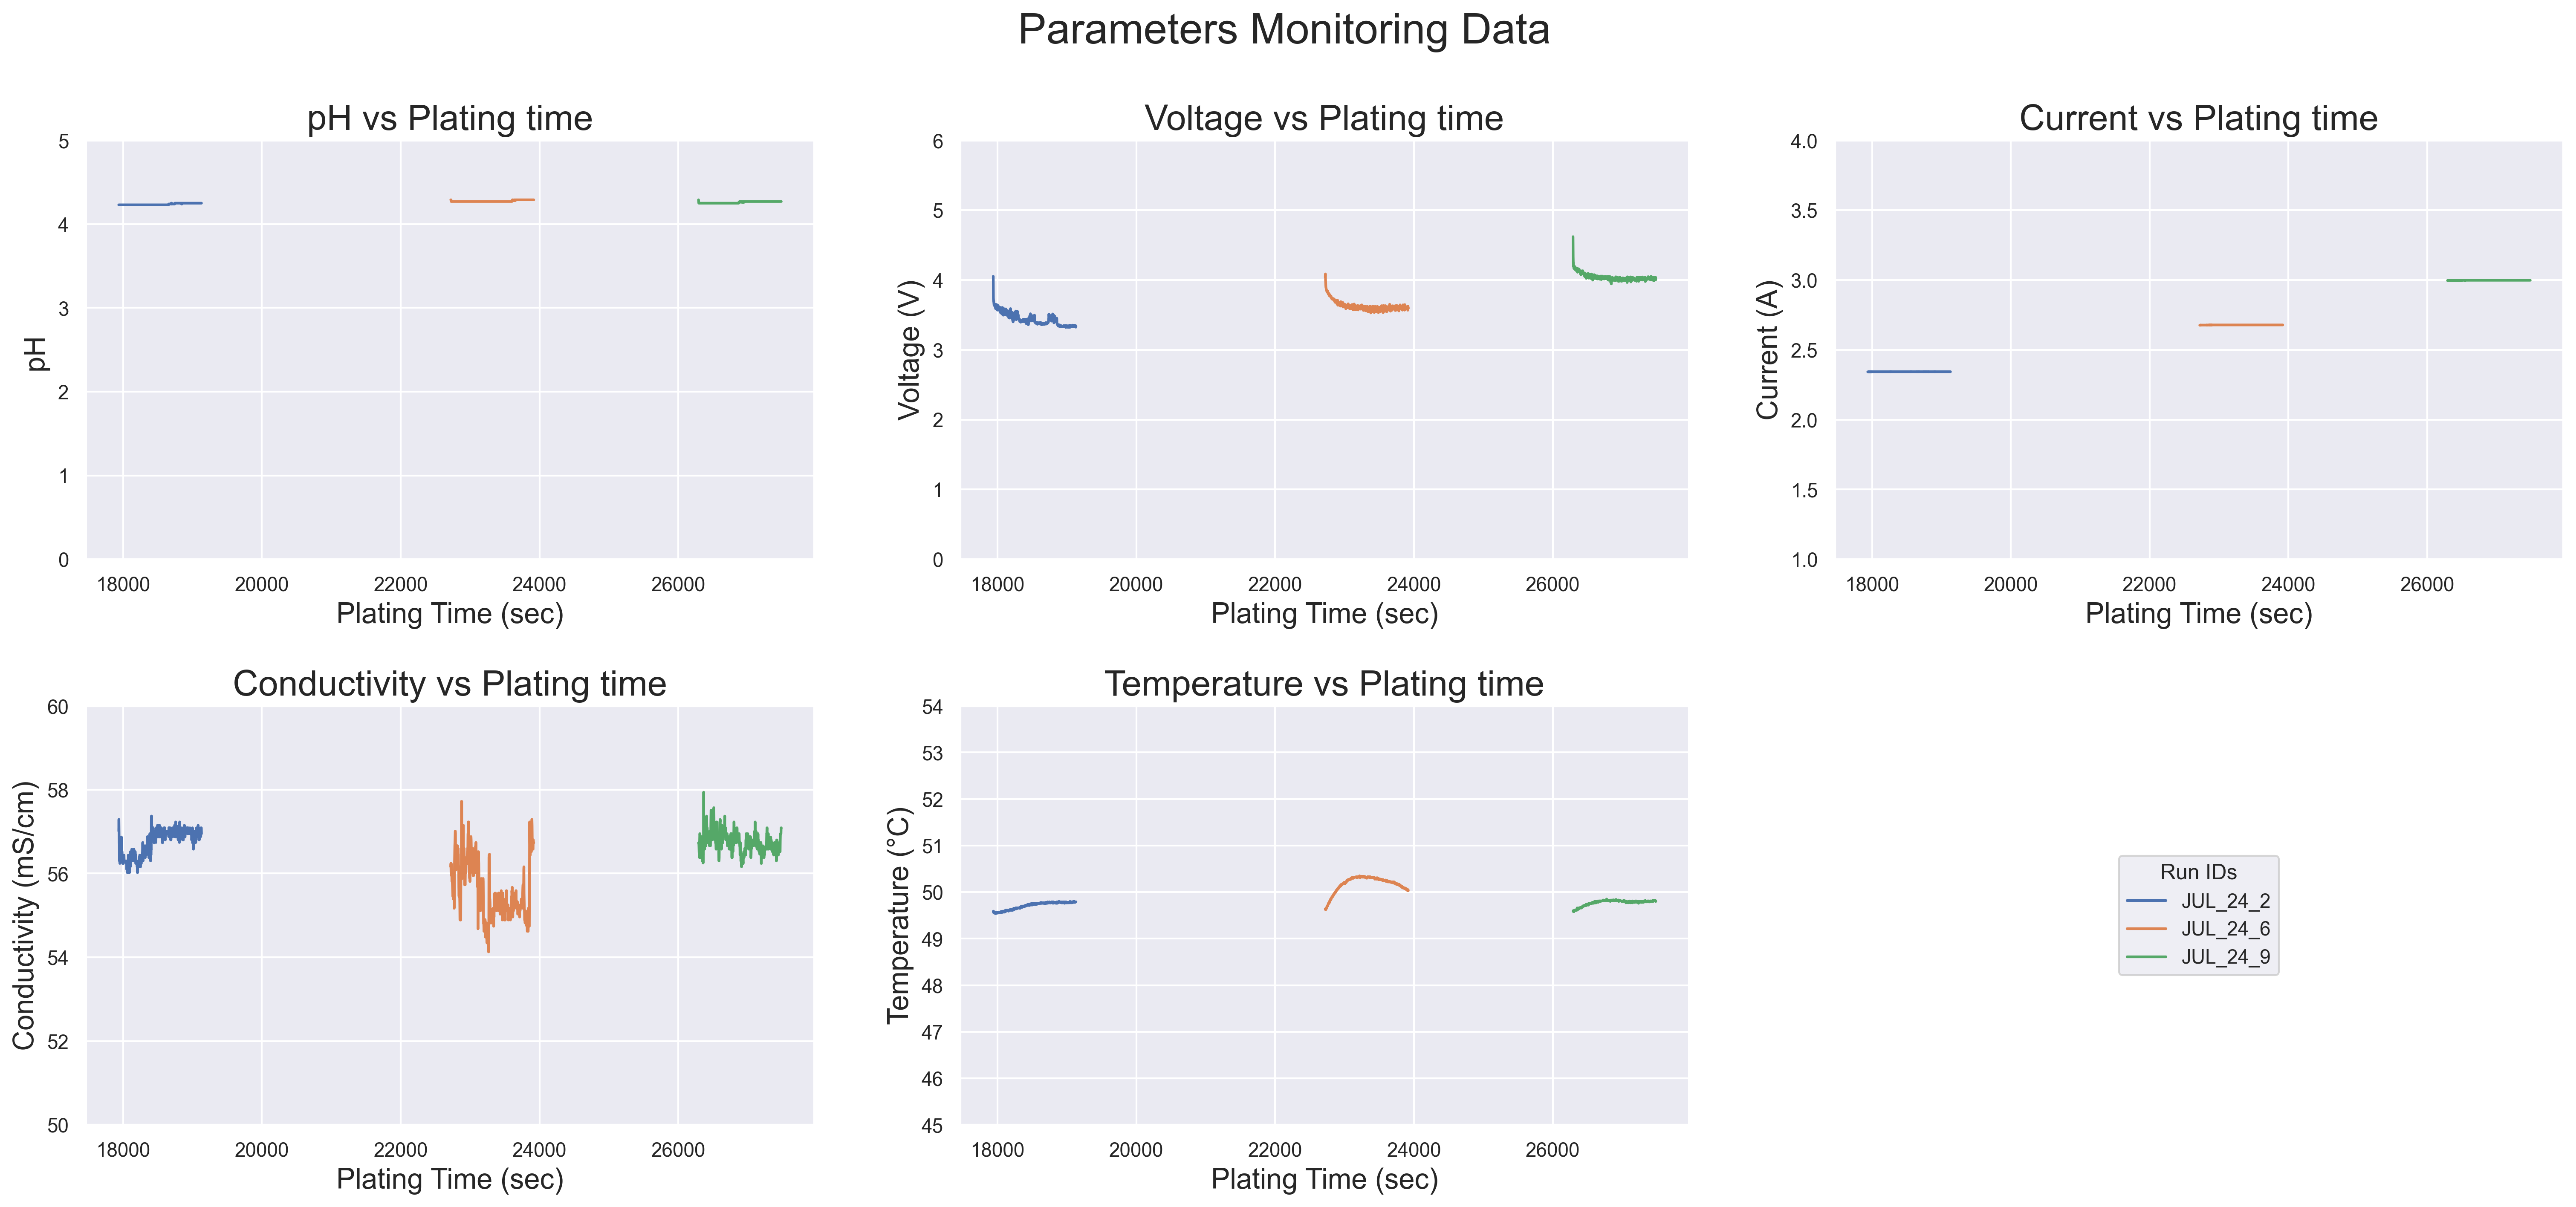

In [26]:
plot_all_params(internal_df, ['JUL_24_2', 'JUL_24_6', 'JUL_24_9'], PARAMS)

##
---

## Saving Graph

In [27]:
# Run This for every individual runs
# save_individual_run(two_side_plate, PARAMS)

  0%|          | 0/88 [00:00<?, ?File/s]

[status] monitoring_JUL_3_1.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_1.png
[status] monitoring_JUL_3_2.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_2.png
[status] monitoring_JUL_3_3.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_3.png
[status] monitoring_JUL_3_4.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_4.png
[status] monitoring_JUL_7_1.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_1.png
[status] monitoring_JUL_7_2.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_2.png
[status] monitoring_JUL_7_3.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_3.png
[status] monitoring_JUL_7_4.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_4.png
[status] monitoring_JUL_8_1.png was saved successfully at ./monitoring_data/runs/JUL_8/monitoring_JUL_8_1.png
[status] m

AttributeError: 'NoneType' object has no attribute 'remove'

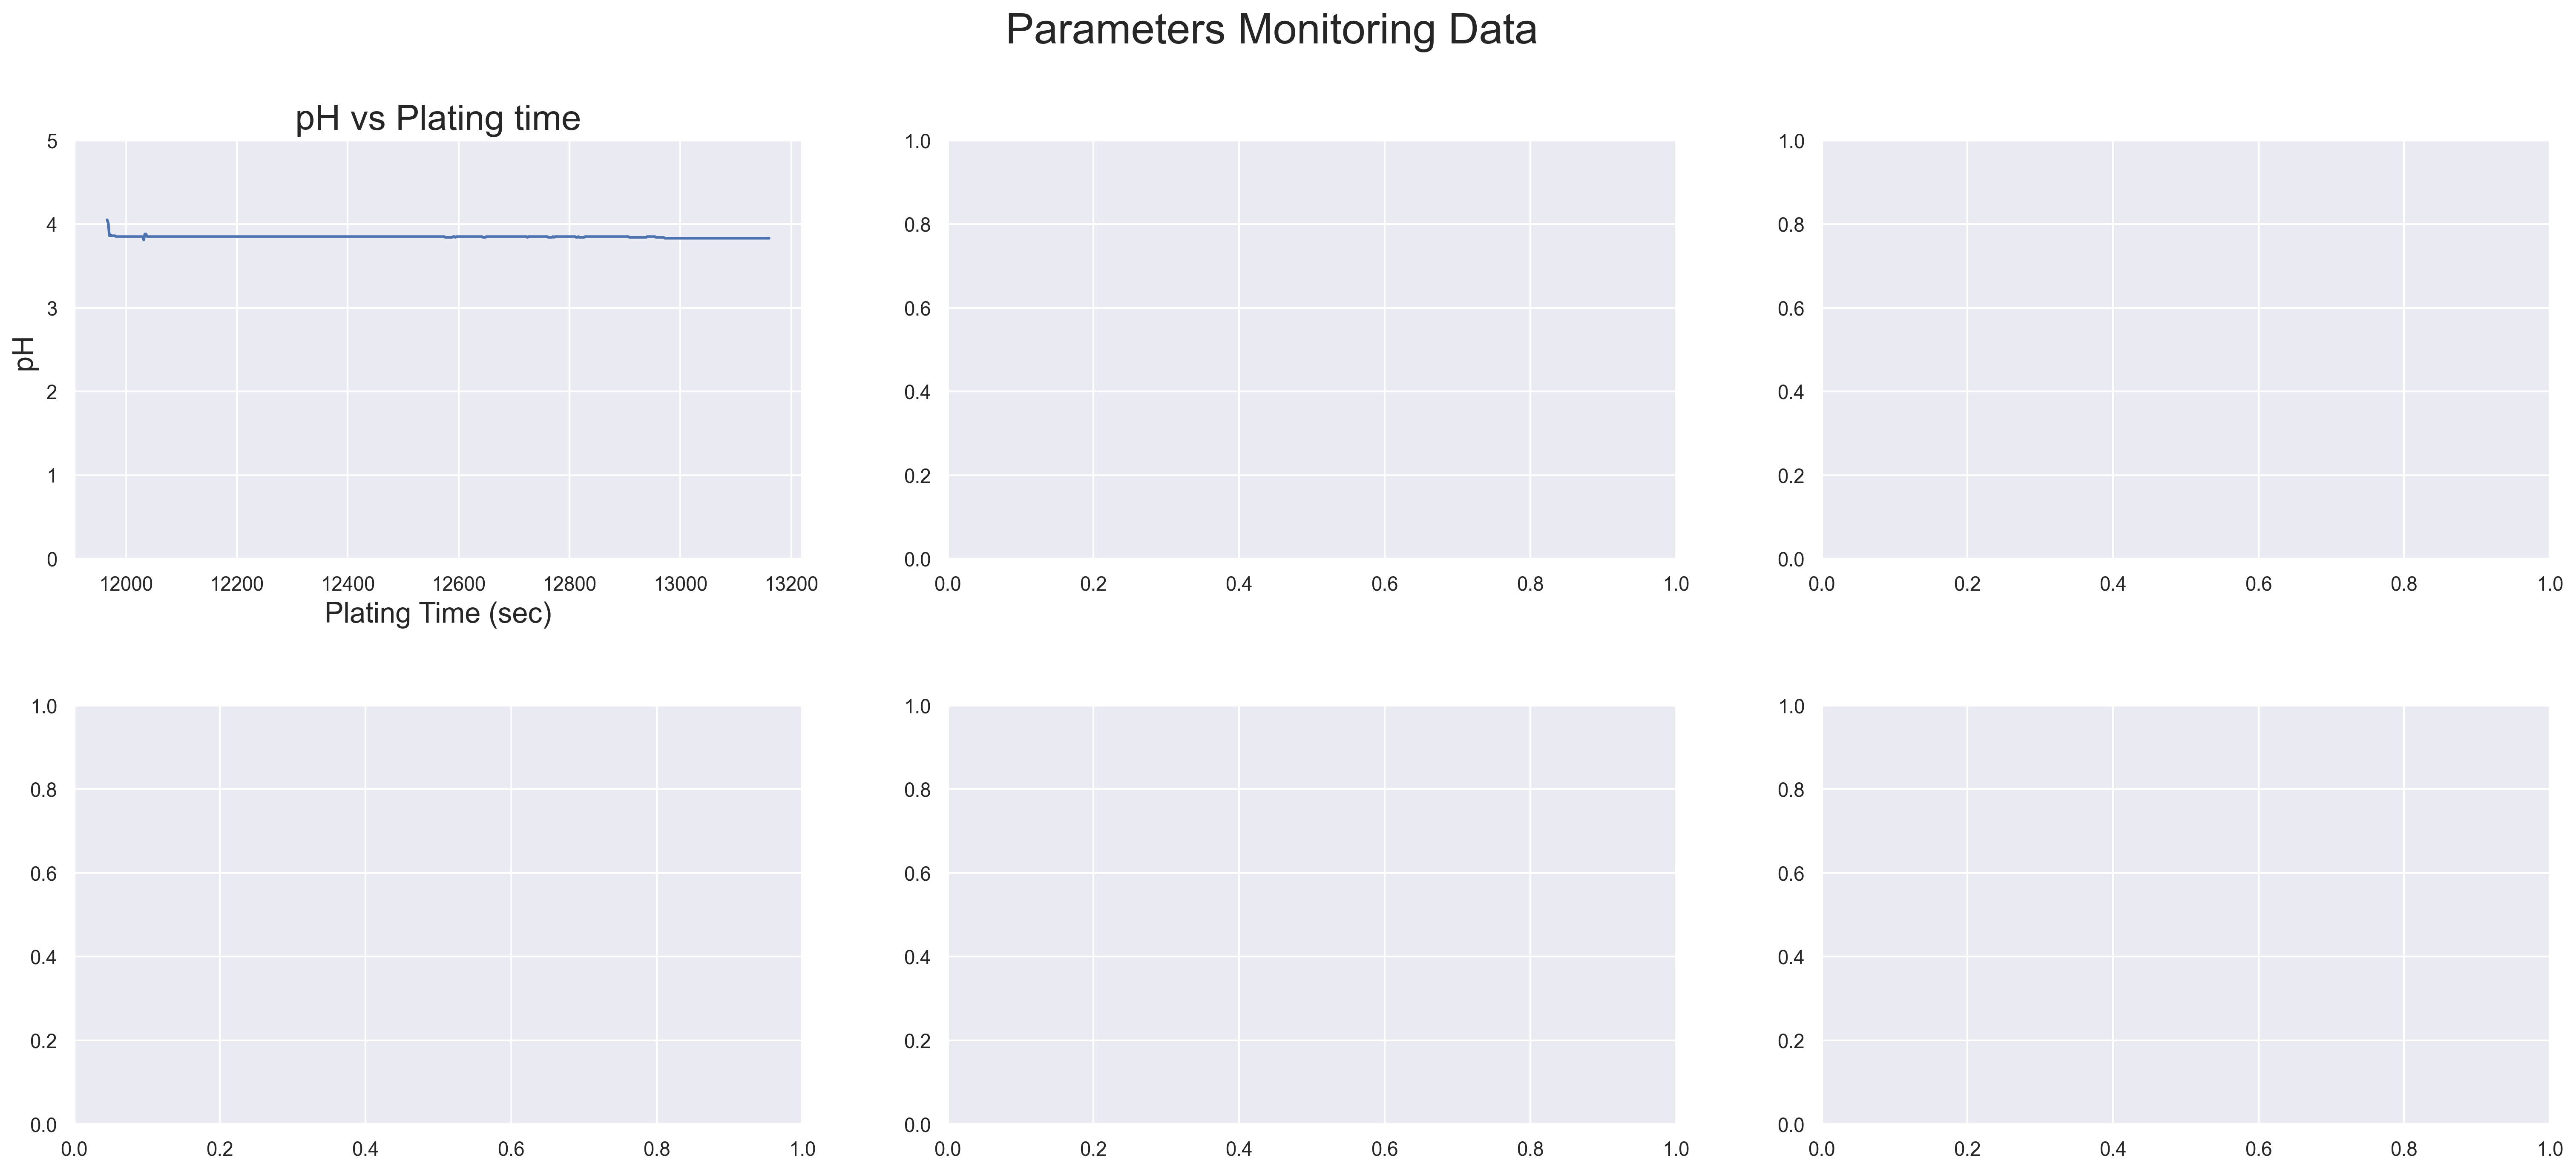

In [28]:
# Run This for every individual runs
save_individual_run(combined_df, PARAMS)

In [ ]:
# Run This to plot each baths
full_bath_condition = (combined_df['bath_id'] != 'Fresh')
bath_number = combined_df[full_bath_condition]['bath_id'].unique()
save_bath(combined_df, bath_number, PARAMS)

  0%|          | 0/9 [00:00<?, ?File/s]

[status] monitoring_Bath_1.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_1.png
[status] monitoring_Bath_2.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_2.png
[status] monitoring_Bath_3.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_3.png
[status] monitoring_Bath_4.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_4.png
[status] monitoring_Bath_5.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_5.png
[status] monitoring_Bath_6.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_6.png
[status] monitoring_Bath_7.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_7.png
[status] monitoring_Bath_8.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_8.png
[status] monitoring_Bath_9.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_9.png
[Save Completed >_<]


##
---

In [ ]:
specific_condition = combined_df['bath_id'] == 'Bath_3'
bath_number = combined_df[specific_condition]['run_id'].unique()
bath_number

array(['JUL_22_1', 'JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5',
       'JUL_22_6', 'JUL_22_7', 'JUL_22_8', 'JUL_22_9', 'JUL_23_1',
       'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5', 'JUL_24_1',
       'JUL_24_2', 'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6',
       'JUL_24_7', 'JUL_24_8', 'JUL_24_9', 'JUL_24_10'], dtype=object)

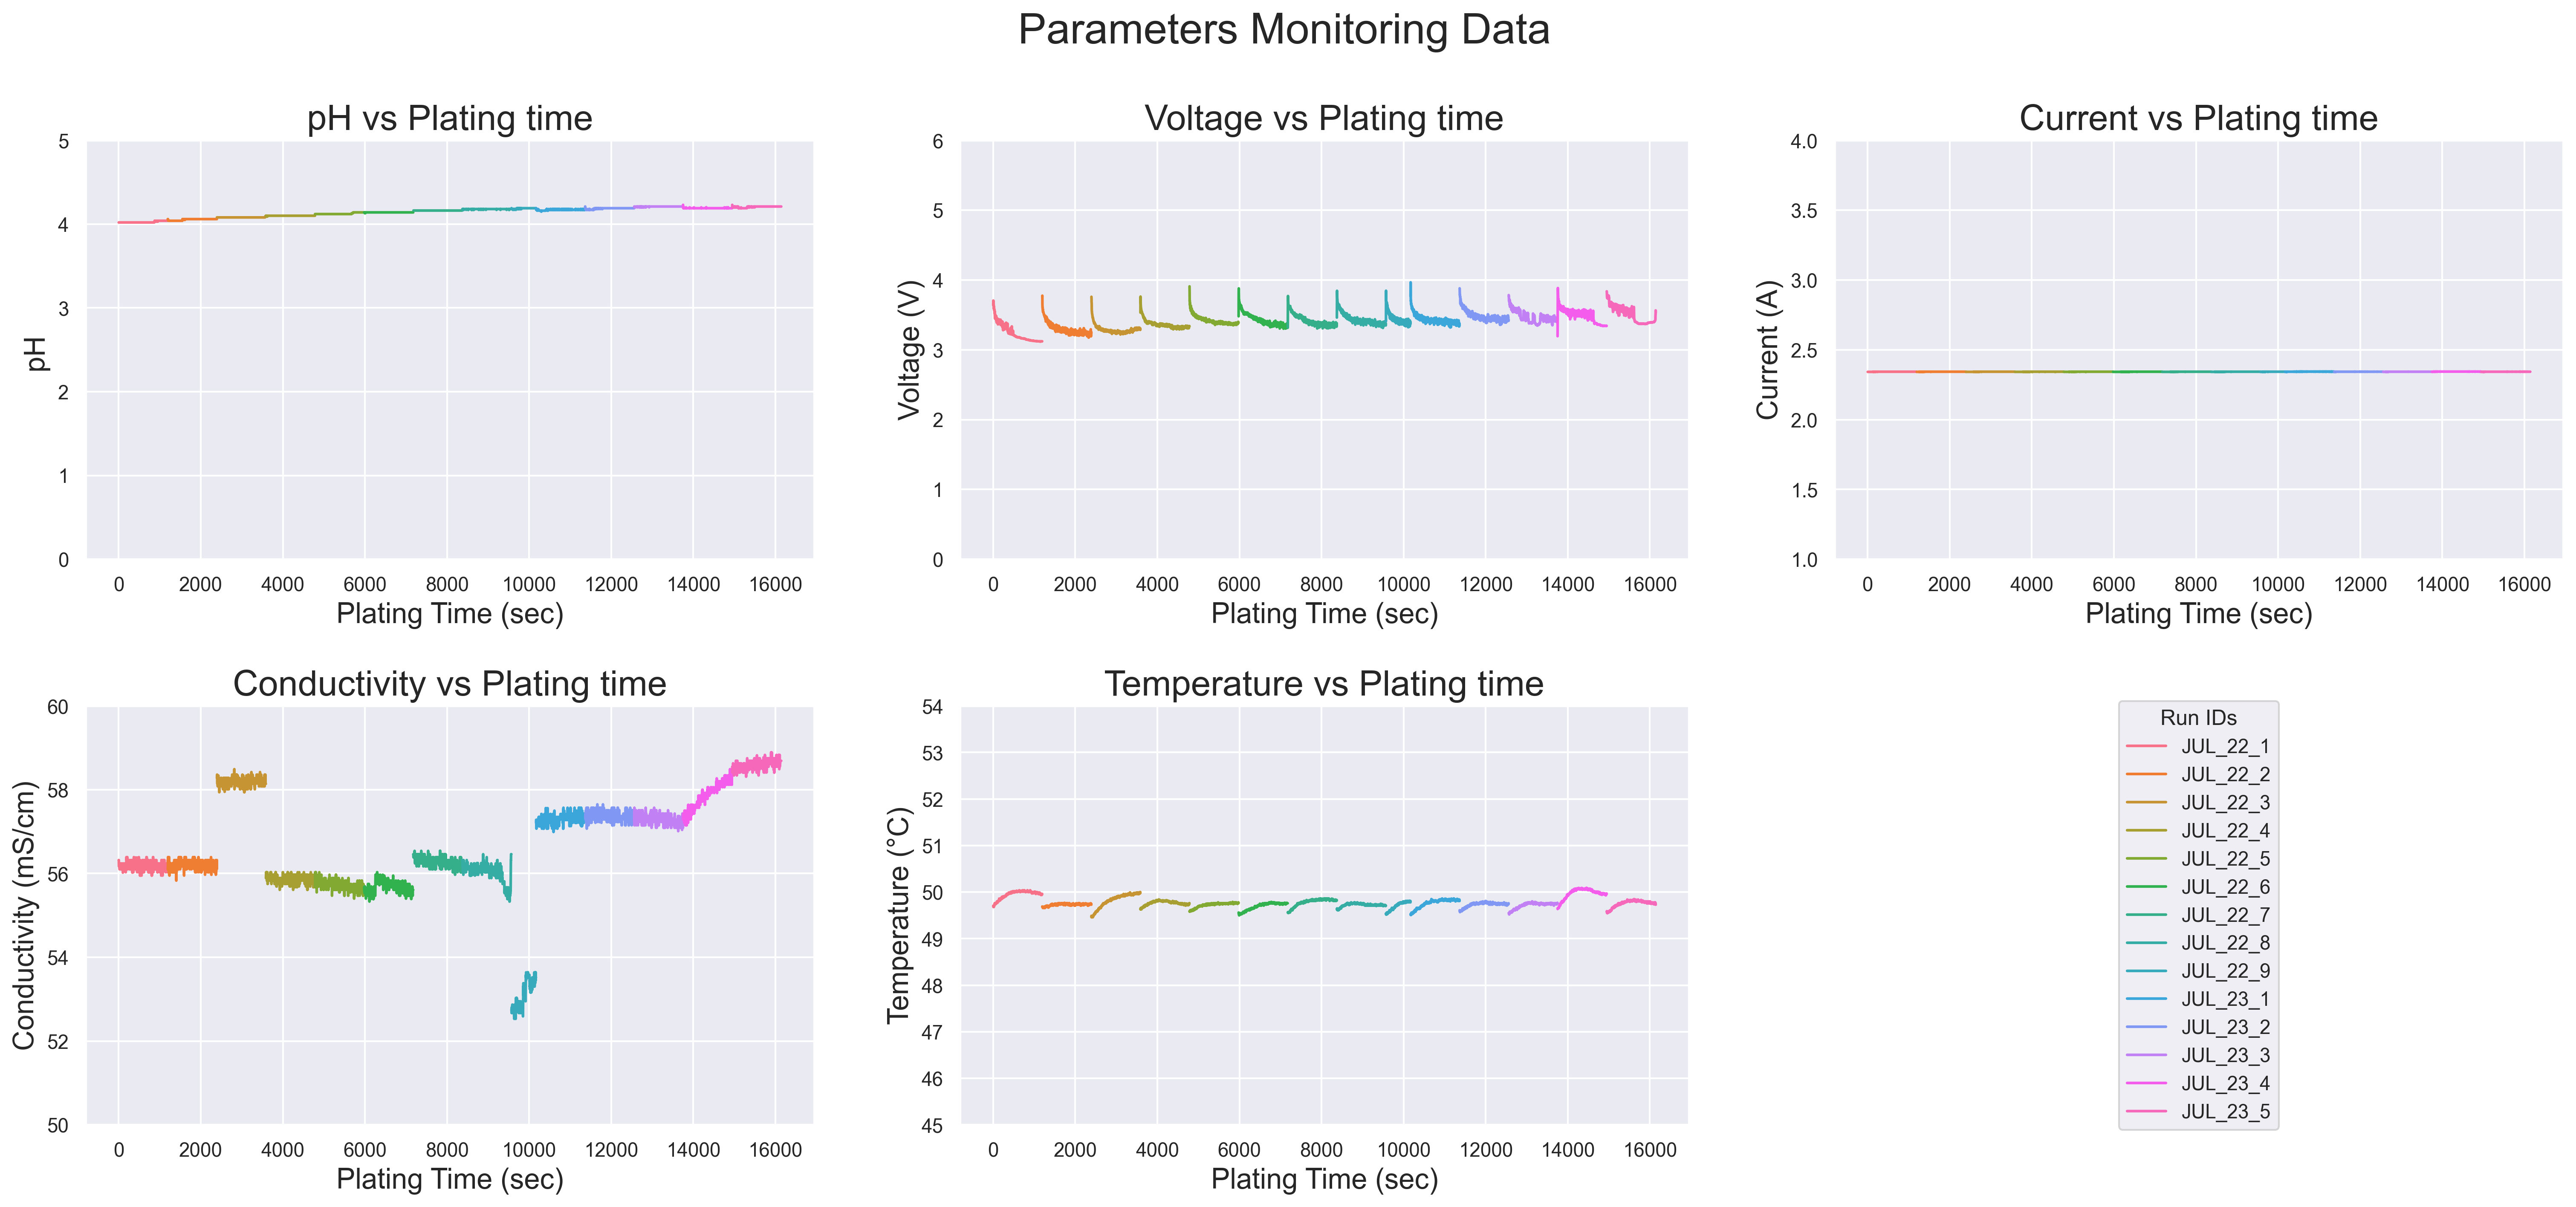

In [ ]:
# Ping request

specific_bath = ['JUL_22_1', 'JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6', 'JUL_22_7', 'JUL_22_8', 'JUL_22_9', 'JUL_23_1', 'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5']

plot_all_params(internal_df, specific_bath, PARAMS)

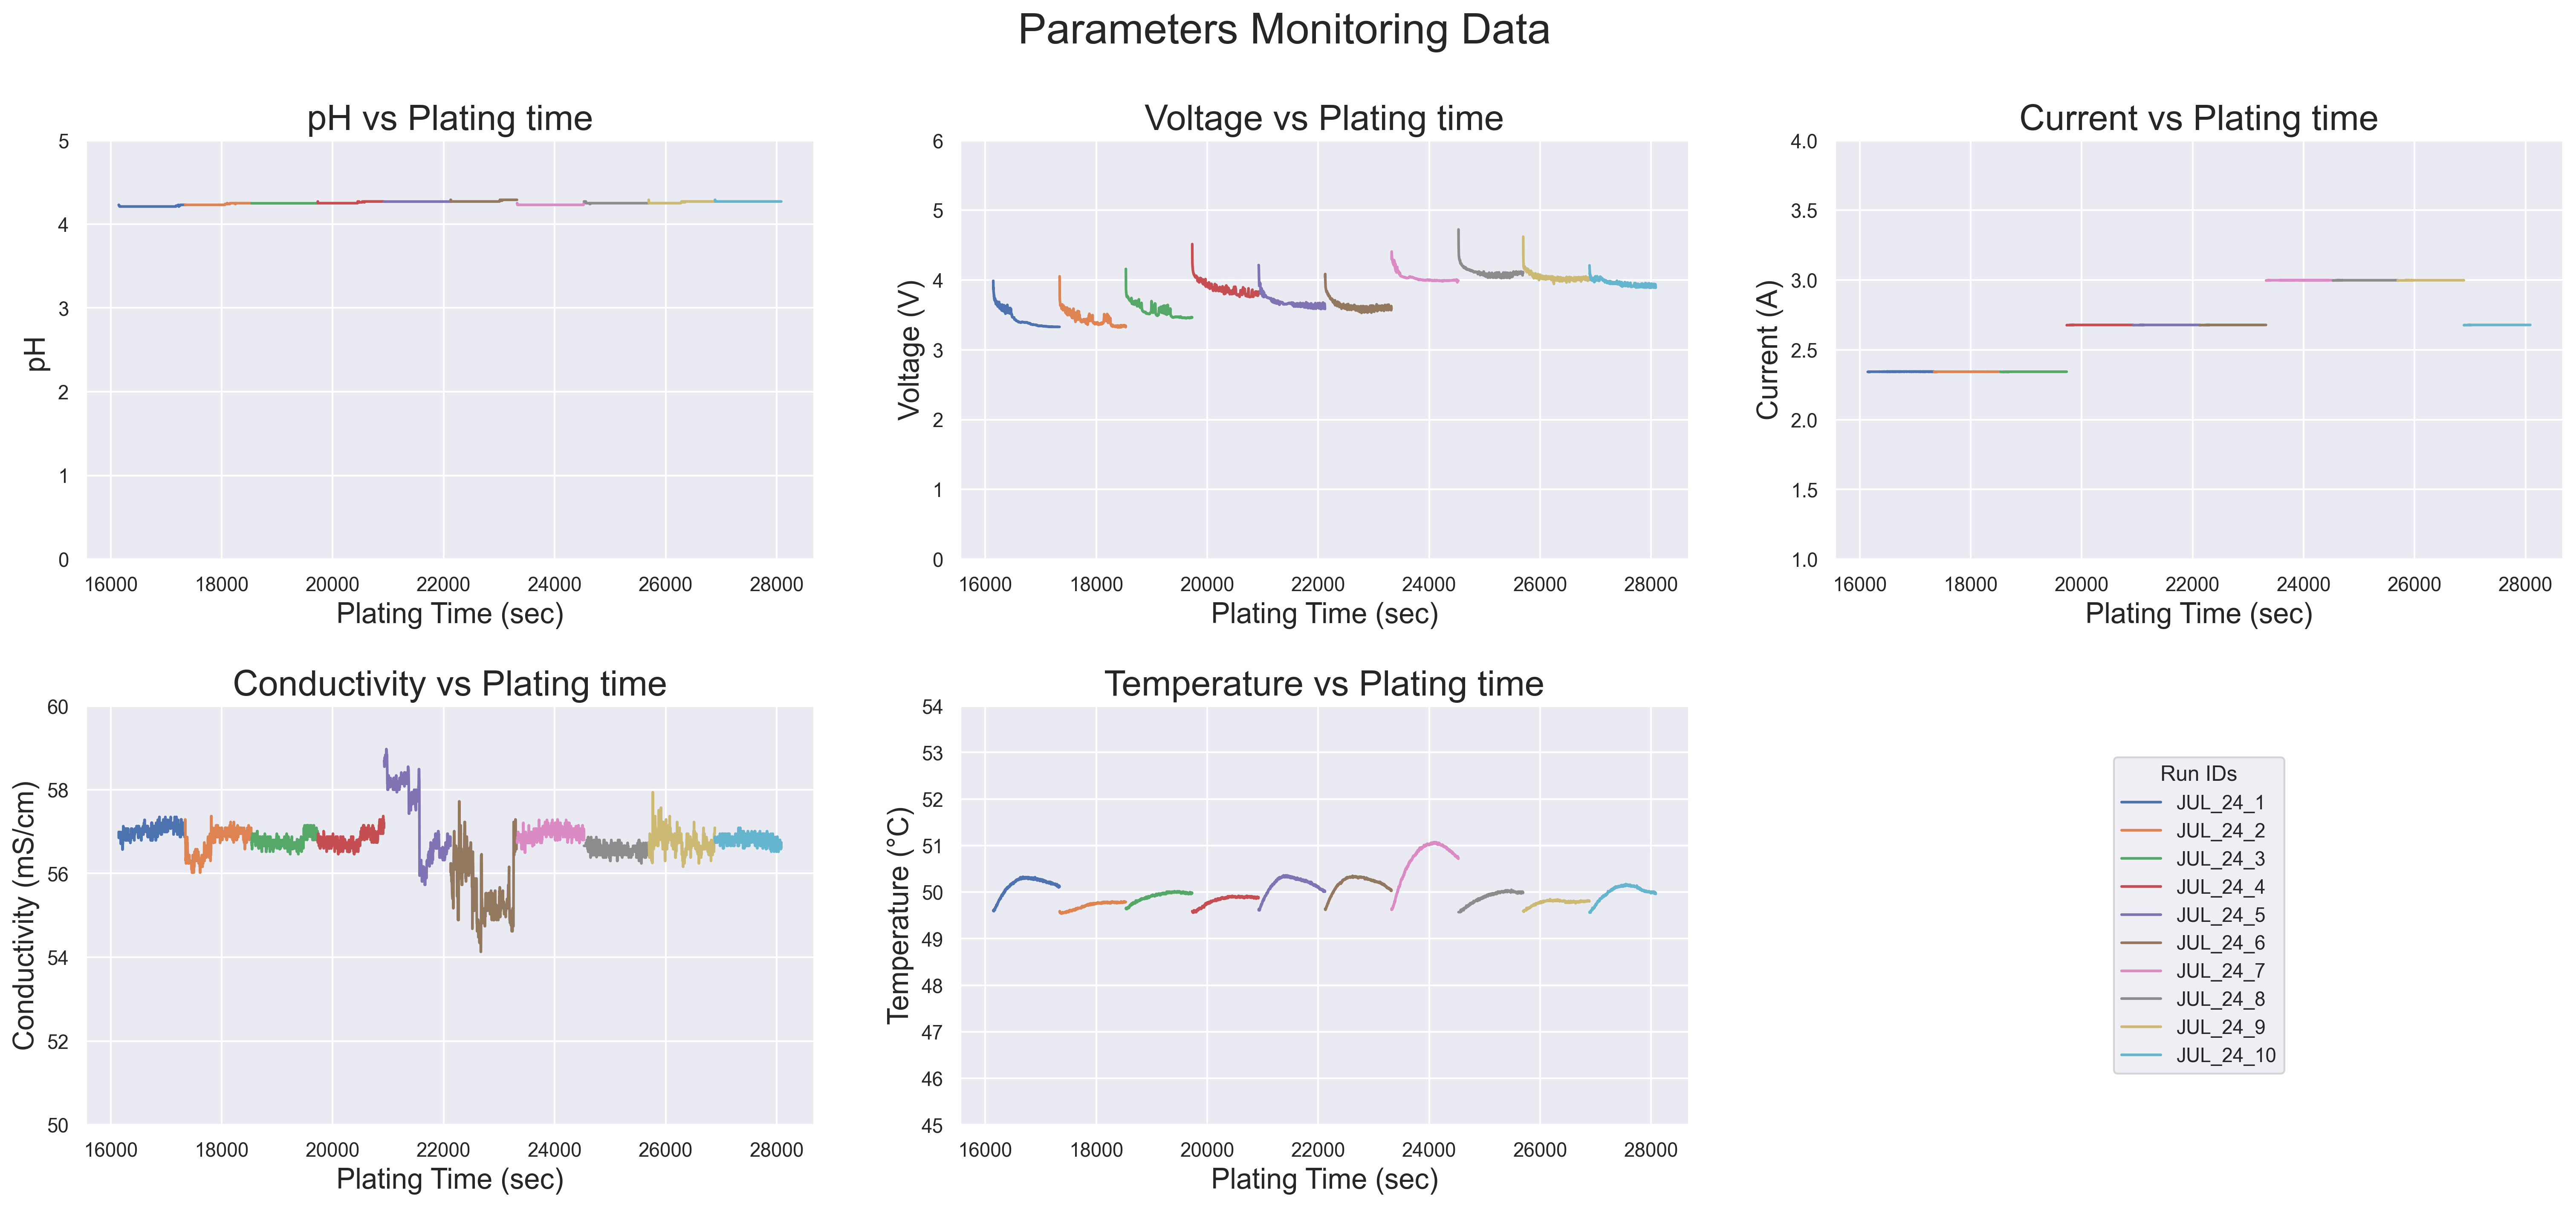

In [ ]:
# Other ping request
other_specific_bath = ['JUL_24_1', 'JUL_24_2', 'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7', 'JUL_24_8', 'JUL_24_9', 'JUL_24_10']
plot_all_params(internal_df, other_specific_bath, PARAMS)

In [ ]:
# import seaborn as sns

# # sns.histplot(data = internal_df['deposition_rate'])
# sns.histplot(internal_df['deposition_rate'].unique(), bins=55)